In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
#df_index=pd.read_csv('/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony/Rui_final_notebooks/df_ready_for_index.csv')

df_index=pd.read_csv(r"C:\Users\monbi\OneDrive\Documents\BSE\Term 3\Masters Thesis\ECB_Perceived_Cacophony\Rui_final_notebooks\df_ready_for_index.csv")

In [204]:
# Convert 'Date' column to datetime
df_index['Date'] = pd.to_datetime(df_index['Date'], errors='coerce')

In [205]:
print(df_index.dtypes)

Date               datetime64[ns]
Statement                  object
Name_of_Speaker            object
Sentiment                 float64
Position                   object
dtype: object


In [206]:
df_index

Date                                          Statement  \
0     2022-09-30  At a conference in Florence, Banca d'Italia Go...   
1     2022-09-30  Banca d'Italia Governor  Ignazio Visco  on Fri...   
2     2022-09-30  ECB  Executive Board Member  Isabel Schnabel  ...   
3     2022-09-30  In a speech organised by the Florence School o...   
4     2022-09-30  According to first estimates, euro area inflat...   
...          ...                                                ...   
30163 2023-02-02  The Governing Council will stay the course in ...   
30164 2022-12-15  The Governing Council today decided to raise t...   
30165 2022-10-27  The Governing Council today decided to raise t...   
30166 2022-09-08  The Governing Council today decided to raise t...   
30167 2022-07-21  Today, in line with the Governing Council's st...   

              Name_of_Speaker  Sentiment                   Position  
0               Mario Centeno       -1.0                   Governor  
1               Ignazio Visco       -1.0                   Governor  
2             Isabel Schnabel        1.0          Executive Council  
3               Ignazio Visco        1.0                   Governor  
4           Christine Lagarde        1.0          Executive Council  
...                       ...        ...                        ...  
30163  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30164  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30165  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30166  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30167  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  

[30168 rows x 5 columns]

In [207]:
df_index.reset_index(drop=True, inplace=True)

# Average per Speaker, per month.

In [208]:
# Filter the DataFrame to only include data up to December 2023
df_filtered = df_index[df_index['Date'] <= '2023-12-31']

# Group by 'Name_of_Speaker' and month, then calculate the average sentiment
average_sentiment = df_filtered.groupby(['Name_of_Speaker', pd.Grouper(key='Date', freq='M')])['Sentiment'].mean().reset_index()

# Optionally, format the 'Month' column to a more readable format
average_sentiment['Month'] = average_sentiment['Date'].dt.strftime('%Y-%m')

c:\Users\monbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\monbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\monbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\monbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

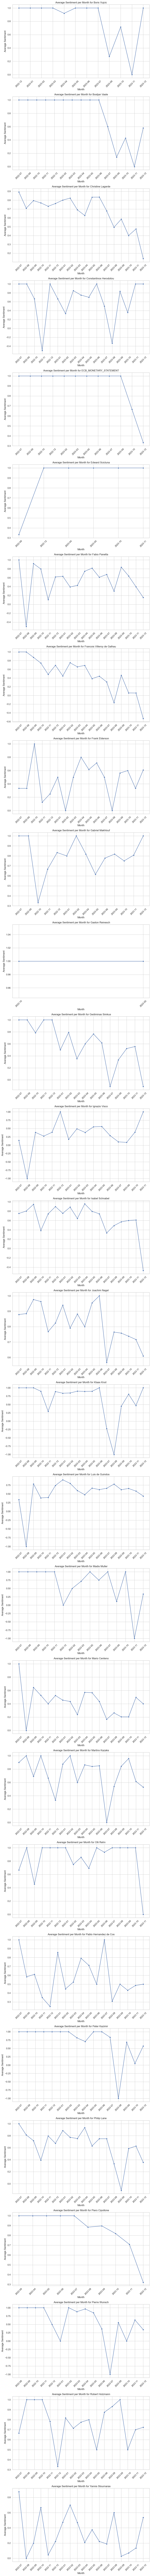

In [209]:
# Set the plotting style
sns.set(style="whitegrid")

# Get unique speakers
unique_speakers = average_sentiment['Name_of_Speaker'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(len(unique_speakers), 1, figsize=(10, 6 * len(unique_speakers)))

# If there's only one speaker, wrap axes in a list for consistent handling
if len(unique_speakers) == 1:
    axes = [axes]

# Loop over each speaker and create a separate plot
for ax, speaker in zip(axes, unique_speakers):
    speaker_data = average_sentiment[average_sentiment['Name_of_Speaker'] == speaker]
    sns.lineplot(data=speaker_data, x='Month', y='Sentiment', ax=ax, marker='o', color='b')
    ax.set_title(f'Average Sentiment per Month for {speaker}')
    ax.set_ylabel('Average Sentiment')
    ax.set_xlabel('Month')
    ax.xaxis.set_tick_params(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Attempt at regressing

In [210]:
# Convert 'Date' column to datetime
df_index['Date'] = pd.to_datetime(df_index['Date'], errors='coerce')

# Filter out rows where the 'Position' column equals 'Monetary Policy Statement'
df_filtered = df_index[df_index['Position'] != 'Monetary Policy Statement']

# Filter the DataFrame to only include data up to December 31, 2023
df_filtered = df_filtered[df_filtered['Date'] <= '2023-12-31']

# Sort by date
df_filtered.sort_values(by='Date', inplace=True)
df_filtered

Date                                          Statement  \
2023  2022-07-02  Euro area inflation has increased to a record ...   
2022  2022-07-02  New figures from the statistics agency Eurosta...   
2015  2022-07-04  At the Frankfurt Euro Finance Summit,  ECB  Vi...   
2021  2022-07-04  In an op-ed for Público, Lisbon School of Econ...   
2020  2022-07-04  In the future, climate protection is to play a...   
...          ...                                                ...   
23458 2023-12-31  Since its introduction on 1 January 1999, the ...   
23459 2023-12-31  Since its introduction on 1 January 1999, the ...   
23460 2023-12-31  An editorial examines the outlook for 2024. At...   
23448 2023-12-31  It is not yet clear exactly when interest rate...   
23455 2023-12-31  The US Federal Reserve and the  ECB  never tir...   

         Name_of_Speaker  Sentiment           Position  
2023   Christine Lagarde        1.0  Executive Council  
2022   Christine Lagarde        1.0  Executive Council  
2015   Christine Lagarde        1.0  Executive Council  
2021   Christine Lagarde        1.0  Executive Council  
2020   Christine Lagarde        1.0  Executive Council  
...                  ...        ...                ...  
23458  Christine Lagarde        1.0  Executive Council  
23459  Christine Lagarde        1.0  Executive Council  
23460  Christine Lagarde        1.0  Executive Council  
23448  Christine Lagarde       -1.0  Executive Council  
23455        Philip Lane        1.0  Executive Council  

[29399 rows x 5 columns]

In [211]:
# Set the 'Date' column as the index
df_filtered.set_index('Date', inplace=True)

# Calculate average sentiment per speaker per month
average_sentiment_per_speaker = df_filtered.groupby(['Name_of_Speaker', pd.Grouper(freq='M')])['Sentiment'].mean().unstack(0)

# Add a 'Month' column
average_sentiment_per_speaker['Month'] = average_sentiment_per_speaker.index.strftime('%Y-%m')

average_sentiment_per_speaker



Name_of_Speaker  Boris Vujcic  Bostjan Vasle  Christine Lagarde  \
Date                                                              
2022-07-31                NaN       1.000000           0.892562   
2022-08-31                NaN            NaN           0.709091   
2022-09-30                NaN       1.000000           0.794840   
2022-10-31                NaN       1.000000           0.769122   
2022-11-30                NaN       1.000000           0.730887   
2022-12-31           1.000000       1.000000           0.761842   
2023-01-31           1.000000            NaN           0.800738   
2023-02-28           1.000000       1.000000           0.823418   
2023-03-31           1.000000       1.000000           0.690329   
2023-04-30           0.920000       1.000000           0.626582   
2023-05-31           1.000000       1.000000           0.833980   
2023-06-30           1.000000       1.000000           0.834320   
2023-07-31           1.000000       0.600000           0.678837   
2023-08-31                NaN            NaN           0.493610   
2023-09-30           0.272727       0.142857           0.585554   
2023-10-31           0.714286       0.428571           0.400174   
2023-11-30           0.000000       0.000000           0.473892   
2023-12-31           1.000000       0.578947           0.139028   

Name_of_Speaker  Constantinos Herodotou  Edward Scicluna  Fabio Panetta  \
Date                                                                      
2022-07-31                     1.000000              NaN       1.000000   
2022-08-31                          NaN              NaN      -0.500000   
2022-09-30                     1.000000         0.333333       0.916667   
2022-10-31                     0.666667              NaN       0.795918   
2022-11-30                    -0.500000              NaN       0.106383   
2022-12-31                     1.000000         1.000000       0.619048   
2023-01-31                     0.666667              NaN       0.632653   
2023-02-28                     0.333333              NaN       0.391304   
2023-03-31                     0.850000              NaN       0.428571   
2023-04-30                     0.750000         1.000000       0.744681   
2023-05-31                     0.700000         1.000000       0.814815   
2023-06-30                     1.000000              NaN       0.609589   
2023-07-31                     0.500000              NaN       0.673913   
2023-08-31                    -0.333333              NaN       0.298701   
2023-09-30                     0.833333              NaN       0.836735   
2023-10-31                     0.357143         1.000000       0.638889   
2023-11-30                     1.000000         1.000000       0.397059   
2023-12-31                     1.000000              NaN       0.153846   

Name_of_Speaker  Francois Villeroy de Galhau  Frank Elderson  \
Date                                                           
2022-07-31                          1.000000        0.333333   
2022-08-31                          1.000000             NaN   
2022-09-30                          0.875000        0.333333   
2022-10-31                          0.743590        1.000000   
2022-11-30                          0.484848        0.125000   
2022-12-31                          0.692308        0.250000   
2023-01-31                          0.448276        0.500000   
2023-02-28                          0.750000        0.000000   
2023-03-31                          0.657895        0.500000   
2023-04-30                          0.689655        0.800000   
2023-05-31                          0.385965        0.615385   
2023-06-30                          0.441860        0.714286   
2023-07-31                          0.309859        0.500000   
2023-08-31                         -0.166667        0.000000   
2023-09-30                          0.462963        0.562500   
2023-10-31                          0.057471        0.600000   
2023-1

In [212]:
# Save to CSV
#average_sentiment_per_speaker.to_csv('./Rui_final_notebooks/average_sentiment_per_speaker.csv')

# Save to CSV
output_path = r"C:\Users\monbi\OneDrive\Documents\BSE\Term 3\Masters Thesis\ECB_Perceived_Cacophony\Rui_final_notebooks\average_sentiment_per_speaker.csv"
average_sentiment_per_speaker.to_csv(output_path)


In [213]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
#file_path = '/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony/Rui_final_notebooks/average_sentiment_per_speaker.csv'  # Replace with your actual file path
#data = pd.read_csv(file_path)

# Save to CSV
# Load the CSV file into a DataFrame
data = pd.read_csv(r"C:\Users\monbi\OneDrive\Documents\BSE\Term 3\Masters Thesis\ECB_Perceived_Cacophony\Rui_final_notebooks\average_sentiment_per_speaker.csv")

data

Date  Boris Vujcic  Bostjan Vasle  Christine Lagarde  \
0   2022-07-31           NaN       1.000000           0.892562   
1   2022-08-31           NaN            NaN           0.709091   
2   2022-09-30           NaN       1.000000           0.794840   
3   2022-10-31           NaN       1.000000           0.769122   
4   2022-11-30           NaN       1.000000           0.730887   
5   2022-12-31      1.000000       1.000000           0.761842   
6   2023-01-31      1.000000            NaN           0.800738   
7   2023-02-28      1.000000       1.000000           0.823418   
8   2023-03-31      1.000000       1.000000           0.690329   
9   2023-04-30      0.920000       1.000000           0.626582   
10  2023-05-31      1.000000       1.000000           0.833980   
11  2023-06-30      1.000000       1.000000           0.834320   
12  2023-07-31      1.000000       0.600000           0.678837   
13  2023-08-31           NaN            NaN           0.493610   
14  2023-09-30      0.272727       0.142857           0.585554   
15  2023-10-31      0.714286       0.428571           0.400174   
16  2023-11-30      0.000000       0.000000           0.473892   
17  2023-12-31      1.000000       0.578947           0.139028   

    Constantinos Herodotou  Edward Scicluna  Fabio Panetta  \
0                 1.000000              NaN       1.000000   
1                      NaN              NaN      -0.500000   
2                 1.000000         0.333333       0.916667   
3                 0.666667              NaN       0.795918   
4                -0.500000              NaN       0.106383   
5                 1.000000         1.000000       0.619048   
6                 0.666667              NaN       0.632653   
7                 0.333333              NaN       0.391304   
8                 0.850000              NaN       0.428571   
9                 0.750000         1.000000       0.744681   
10                0.700000         1.000000       0.814815   
11                1.000000              NaN       0.609589   
12                0.500000              NaN       0.673913   
13               -0.333333              NaN       0.298701   
14                0.833333              NaN       0.836735   
15                0.357143         1.000000       0.638889   
16                1.000000         1.000000       0.397059   
17                1.000000              NaN       0.153846   

    Francois Villeroy de Galhau  Frank Elderson  Gabriel Makhlouf  ...  \
0                      1.000000        0.333333          1.000000  ...   
1                      1.000000             NaN               NaN  ...   
2                      0.875000        0.333333          1.000000  ...   
3                      0.743590        1.000000          0.333333  ...   
4                      0.484848        0.125000          0.666667  ...   
5                      0.692308        0.250000          0.833333  ...   
6                      0.448276        0.500000          0.800000  ...   
7                      0.750000        0.000000          1.000000  ...   
8                      0.657895        0.500000               NaN  ...   
9                      0.689655        0.800000          0.818182  ...   
10                     0.385965        0.615385          0.615385  ...   
11                     0.441860        0.714286          0.777778  ...   
12                     0.309859        0.500000               NaN  ...   
13                    -0.166667        0.000000               NaN  ...   
14                     0.462963        0.562500          0.818182  ...   
15                     0.057471        0.600000          0.750000  ...   
16                     0.055556        0.333333          0.807692  ...   
17                    -0.531646        0.608696          1.000000  ...   

    Martins Kazaks  Olli Rehn  Pablo Hernandez de Cos  Peter Kazimir  \
0         0.900000   0.666667                1.000000       1.000000   
1         1.000000   1.00

# Aggregrating per ecb policy statement

In [214]:
filtered_df = df_index[df_index['Position'] == 'Monetary Policy Statement']
filtered_df


Date                                          Statement  \
30154 2024-03-07  The Governing Council today decided to keep th...   
30155 2024-01-25  The Governing Council today decided to keep th...   
30156 2023-12-14  The Governing Council today decided to keep th...   
30157 2023-10-26  The Governing Council today decided to keep th...   
30158 2023-09-14  Inflation continues to decline but is still ex...   
30159 2023-07-27  Inflation continues to decline but is still ex...   
30160 2023-06-15  Inflation has been coming down but is projecte...   
30161 2023-05-04  The inflation outlook continues to be too high...   
30162 2023-03-16  Inflation is projected to remain too high for ...   
30163 2023-02-02  The Governing Council will stay the course in ...   
30164 2022-12-15  The Governing Council today decided to raise t...   
30165 2022-10-27  The Governing Council today decided to raise t...   
30166 2022-09-08  The Governing Council today decided to raise t...   
30167 2022-07-21  Today, in line with the Governing Council's st...   

              Name_of_Speaker  Sentiment                   Position  
30154  ECB_MONETARY_STATEMENT   0.000000  Monetary Policy Statement  
30155  ECB_MONETARY_STATEMENT   0.666667  Monetary Policy Statement  
30156  ECB_MONETARY_STATEMENT   0.333333  Monetary Policy Statement  
30157  ECB_MONETARY_STATEMENT   0.666667  Monetary Policy Statement  
30158  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30159  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30160  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30161  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30162  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30163  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30164  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30165  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30166  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30167  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement

In [215]:
# Given dates
dates = [
 '2023-12-14','2023-10-26', '2023-09-14', 
    '2023-07-27', '2023-06-15', '2023-05-04', '2023-03-16', '2023-02-02', 
    '2022-12-15', '2022-10-27', '2022-09-08', '2022-07-21'
]
date_df = pd.DataFrame({'Date': pd.to_datetime(dates)})

# Filter the DataFrame to only include data up to December 2023
df_index = df_index[df_index['Position'] != 'Monetary Policy Statement']


In [216]:
# Function to find the period for each date in df_index
def find_period(date, periods):
    for i in range(len(periods) - 1):
        if periods[i] <= date < periods[i + 1]:
            return periods[i]
    return periods.iloc[-1]  # Use iloc to access the last element

# Sort periods to ensure correct interval assignment
periods = date_df['Date'].sort_values().reset_index(drop=True)

# Add a period column to the main DataFrame
df_index['Period'] = df_index['Date'].apply(lambda x: find_period(x, periods))

# Calculate mean sentiment per period for each speaker
speaker_result = df_index.groupby(['Period', 'Name_of_Speaker'])['Sentiment'].mean().reset_index()

# Calculate overall mean sentiment per period
overall_result = df_index.groupby('Period')['Sentiment'].mean().reset_index()

# Combine results
combined_result = pd.merge(speaker_result, overall_result, on='Period', suffixes=('_Per_Speaker', '_Overall'))


# Display the result
combined_result

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3781621360.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['Period'] = df_index['Date'].apply(lambda x: find_period(x, periods))


Period              Name_of_Speaker  Sentiment_Per_Speaker  \
0   2022-07-21                Bostjan Vasle               1.000000   
1   2022-07-21            Christine Lagarde               0.828452   
2   2022-07-21                Fabio Panetta              -0.384615   
3   2022-07-21  Francois Villeroy de Galhau               1.000000   
4   2022-07-21             Gabriel Makhlouf               1.000000   
..         ...                          ...                    ...   
292 2023-12-14                  Philip Lane               0.393939   
293 2023-12-14              Piero Cipollone               0.705882   
294 2023-12-14                Pierre Wunsch               0.323529   
295 2023-12-14              Robert Holzmann               0.812500   
296 2023-12-14            Yannis Stournaras               0.551724   

     Sentiment_Overall  
0             0.800926  
1             0.800926  
2             0.800926  
3             0.800926  
4             0.800926  
..                 ...  
292           0.186679  
293           0.186679  
294           0.186679  
295           0.186679  
296           0.186679  

[297 rows x 4 columns]

### Verify Data

In [217]:
# Get unique names of speakers
unique_speakers = combined_result['Name_of_Speaker'].unique()

# Convert to DataFrame
unique_speakers_df = pd.DataFrame(unique_speakers, columns=['Name_of_Speaker'])
unique_speakers_df

Name_of_Speaker
0                 Bostjan Vasle
1             Christine Lagarde
2                 Fabio Panetta
3   Francois Villeroy de Galhau
4              Gabriel Makhlouf
5              Gediminas Simkus
6                 Ignazio Visco
7               Isabel Schnabel
8                 Joachim Nagel
9                    Klaas Knot
10              Luis de Guindos
11                 Madis Muller
12                Mario Centeno
13               Martins Kazaks
14                    Olli Rehn
15       Pablo Hernandez de Cos
16                Peter Kazimir
17                  Philip Lane
18                Pierre Wunsch
19              Robert Holzmann
20            Yannis Stournaras
21       Constantinos Herodotou
22              Edward Scicluna
23               Frank Elderson
24              Gaston Reinesch
25              Piero Cipollone
26                 Boris Vujcic

In [218]:
df_governors = pd.read_csv(r"C:\Users\monbi\OneDrive\Documents\BSE\Term 3\Masters Thesis\ECB_Perceived_Cacophony\ECB Governors Analysis\ecb_governing_council.csv")

# Overwrite the 'Position' column with 'Executive Role' values where 'Executive Role' is populated
df_governors['Position'] = df_governors['Executive Role'].combine_first(df_governors['Position'])

# Select only the columns 'Full Name', 'Country', and 'Position'
df_governors = df_governors[['Full Name', 'Country', 'Position']]

df_governors

Full Name              Country  \
0             Christine Lagarde               France   
1               Luis de Guindos                Spain   
2               Piero Cipollone                Italy   
3                   Philip Lane  Republic of Ireland   
4                Frank Elderson          Netherlands   
5               Isabel Schnabel              Germany   
6        Pablo Hernandez de Cos                Spain   
7                 Joachim Nagel              Germany   
8                 Pierre Wunsch              Belgium   
9             Yannis Stournaras               Greece   
10                 Boris Vujcic              Croatia   
11              Gaston Reinesch           Luxembourg   
12  Francois Villeroy de Galhau               France   
13              Robert Holzmann              Austria   
14                Peter Kazimir             Slovakia   
15             Gediminas Simkus            Lithuania   
16                    Olli Rehn              Finland   
17                Mario Centeno             Portugal   
18              Edward Scicluna                Malta   
19                Bostjan Vasle             Slovenia   
20                 Madis Muller              Estonia   
21               Martins Kazaks               Latvia   
22                   Klaas Knot          Netherlands   
23       Constantinos Herodotou               Cyprus   
24             Gabriel Makhlouf  Republic of Ireland   
25                Fabio Panetta                Italy   
26                Ignazio Visco                Italy   

                                             Position  
0                                           President  
1                                      Vice President  
2                       Member of the Executive Board  
3     Member of the Executive Board & Chief Economist  
4   Member of the Executive Board; Vice-chair of t...  
5                       Member of the Executive Board  
6                                   National Governor  
7                                   National Governor  
8                                   National Governor  
9                                   National Governor  
10                                  National Governor  
11                                  National Governor  
12                                  National Governor  
13                                  National Governor  
14                                  National Governor  
15                                  National Governor  
16                                  National Governor  
17                                  National Governor  
18                                  National Governor  
19                                  National Governor  
20                                  National Governor  
21                                  National Governor  
22                                  National Governor  
23                                  National Governor  
24                                  National Governor  
25                                  National Governor  
26                                  National Governor

In [219]:
# Merge the two dataframes on the speaker names to see if all match
merged_df = pd.merge(unique_speakers_df, df_governors, left_on='Name_of_Speaker', right_on='Full Name', how='outer', indicator=True)

# Display mismatches
mismatches = merged_df[merged_df['_merge'] != 'both']

# Check if there are any mismatches
if mismatches.empty:
    print("All speakers in unique_speakers_df match with df_governors.")
else:
    print("There are mismatches between unique_speakers_df and df_governors:")
    print(mismatches[['Name_of_Speaker', 'Full Name', '_merge']])


All speakers in unique_speakers_df match with df_governors.


In [220]:
# Check vice-versa: Ensure all entries in df_governors are in unique_speakers_df
reverse_merged_df = pd.merge(df_governors, unique_speakers_df, left_on='Full Name', right_on='Name_of_Speaker', how='outer', indicator=True)

# Display reverse mismatches
reverse_mismatches = reverse_merged_df[reverse_merged_df['_merge'] != 'both']

# Check if there are any reverse mismatches
if reverse_mismatches.empty:
    print("All entries in df_governors match with unique_speakers_df and vice-versa.")
else:
    print("There are reverse mismatches between df_governors and unique_speakers_df:")
    print(reverse_mismatches[['Full Name', 'Name_of_Speaker', '_merge']])

All entries in df_governors match with unique_speakers_df and vice-versa.


### Now all matched, EDA On Aggregated Speaker

In [221]:
# Summary statistics
summary_stats = combined_result.describe()
summary_stats

Period  Sentiment_Per_Speaker  Sentiment_Overall
count                            297             297.000000         297.000000
mean   2023-04-10 18:49:41.818181888               0.633737           0.623044
min              2022-07-21 00:00:00              -0.600000           0.186679
25%              2022-12-15 00:00:00               0.444444           0.532813
50%              2023-05-04 00:00:00               0.702703           0.683677
75%              2023-09-14 00:00:00               0.879310           0.760195
max              2023-12-14 00:00:00               1.000000           0.800926
std                              NaN               0.327148           0.188740

In [222]:
dict_ECB = {
    'Pablo Hernandez de Cos': 'Spain',
    'Joachim Nagel': 'Germany',
    'Pierre Wunsch': 'Belgium',
    'Yannis Stournaras': 'Greece',
    'Boris Vujcic': 'Croatia',
    'Gaston Reinesch': 'Luxembourg',
    'Francois Villeroy de Galhau': 'France',
    'Robert Holzmann': 'Austria',
    'Peter Kazimir': 'Slovakia',
    'Gediminas Simkus': 'Lithuania',
    'Olli Rehn': 'Finland',
    'Mario Centeno': 'Portugal',
    'Edward Scicluna': 'Malta',
    'Bostjan Vasle': 'Slovenia',
    'Madis Muller': 'Estonia',
    'Martins Kazaks': 'Latvia',
    'Klaas Knot': 'Netherlands',
    'Constantinos Herodotou': 'Cyprus',
    'Gabriel Makhlouf': 'Republic of Ireland',
    'Fabio Panetta': 'Italy',
    'Ignazio Visco': 'Italy'
}


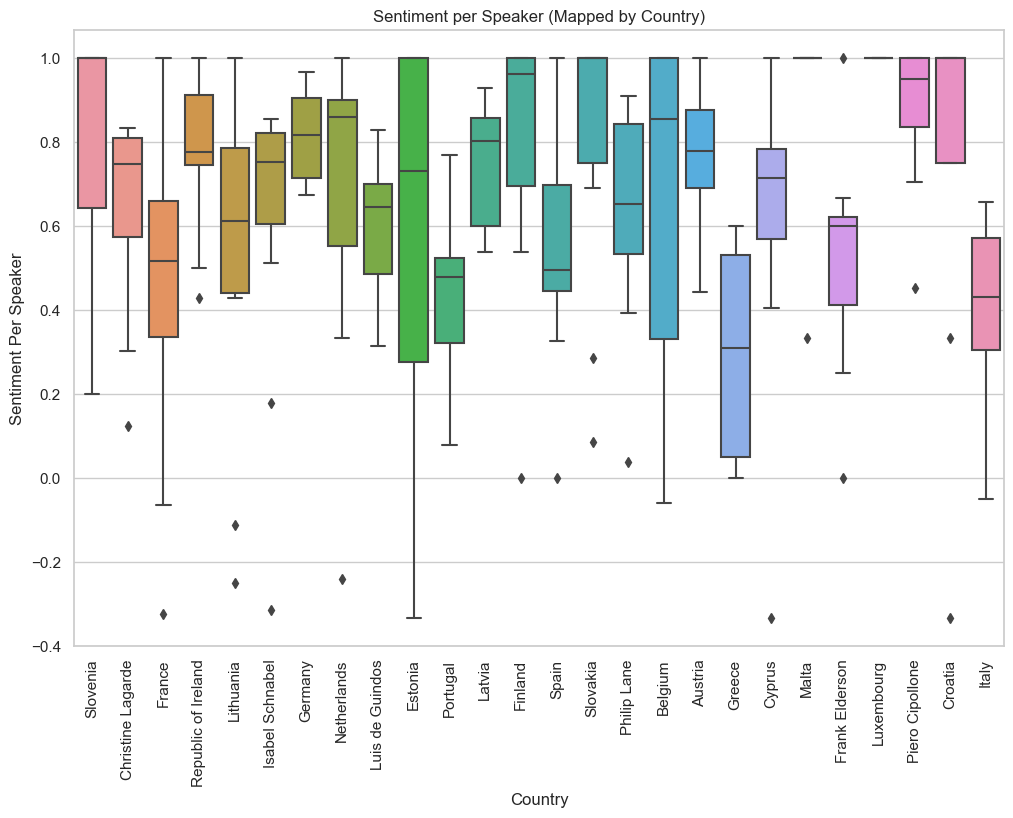

In [223]:
# Map names to countries using the dictionary
combined_result['Country'] = combined_result['Name_of_Speaker'].replace(dict_ECB)

# Combine the sentiments of the two Italian governors by averaging them for each period
italy_combined = combined_result[combined_result['Country'] == 'Italy'].groupby('Period')['Sentiment_Per_Speaker'].mean().reset_index()
italy_combined['Country'] = 'Italy'

# Remove the individual entries for the Italian governors and add the combined sentiment
combined_result = combined_result[combined_result['Country'] != 'Italy']
combined_result = pd.concat([combined_result, italy_combined], ignore_index=True)

# Box plot for sentiment per speaker (now by country)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Sentiment_Per_Speaker', data=combined_result)
plt.title('Sentiment per Speaker (Mapped by Country)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Sentiment Per Speaker')
plt.show()

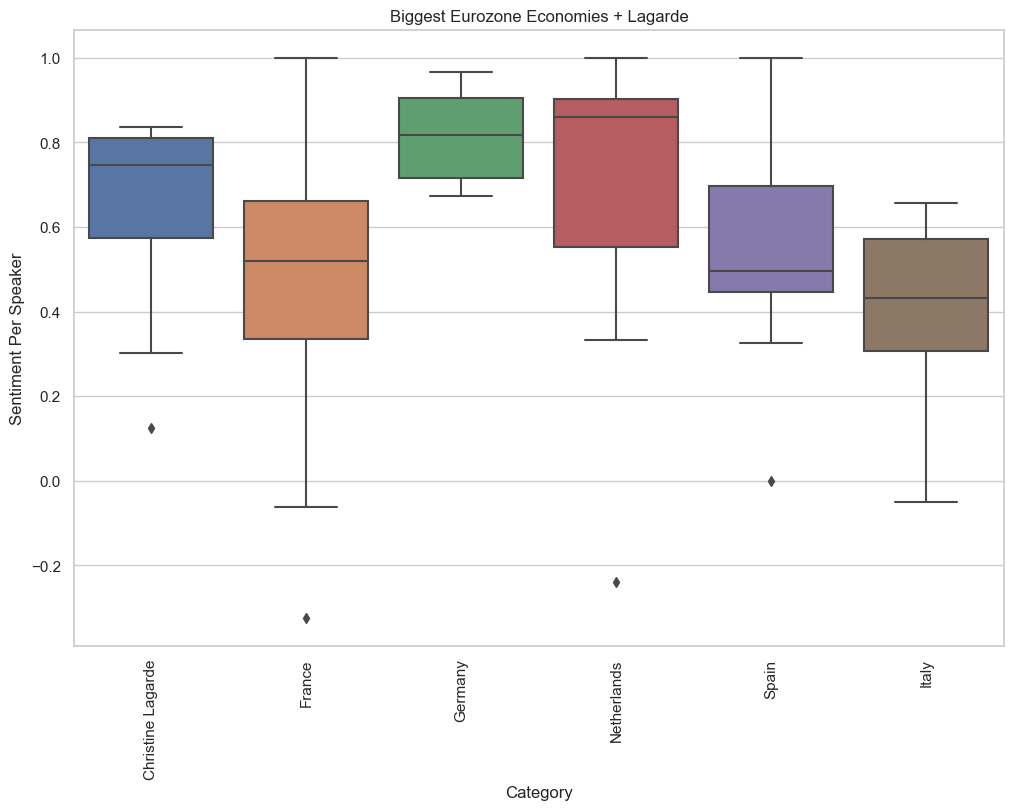

In [224]:
# Define the categories to filter
categories_to_plot = ['Christine Lagarde', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands']

# Filter the DataFrame to include only these categories
filtered_combined_result = combined_result[combined_result['Country'].isin(categories_to_plot)]

# Box plot for sentiment per speaker (now by selected categories)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Sentiment_Per_Speaker', data=filtered_combined_result)
plt.title('Biggest Eurozone Economies + Lagarde')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Sentiment Per Speaker')
plt.show()


# Index with Lagarde as Baseline

Sentiment with Lagarde as Baseline

In [225]:
# Ensure the 'Period' column is in datetime format
combined_result['Period'] = pd.to_datetime(combined_result['Period'])

# Extract Christine Lagarde's sentiment per period
lagarde_sentiment = combined_result[combined_result['Name_of_Speaker'] == 'Christine Lagarde'][['Period', 'Sentiment_Per_Speaker']]
lagarde_sentiment = lagarde_sentiment.rename(columns={'Sentiment_Per_Speaker': 'Lagarde_Sentiment'}) 
lagarde_sentiment


Period  Lagarde_Sentiment
1   2022-07-21           0.828452
20  2022-09-08           0.786194
44  2022-10-27           0.708268
67  2022-12-15           0.819095
89  2023-02-02           0.807810
111 2023-03-16           0.646684
135 2023-05-04           0.835127
159 2023-06-15           0.801483
182 2023-07-27           0.558382
204 2023-09-14           0.580268
228 2023-10-26           0.303125
252 2023-12-14           0.124584

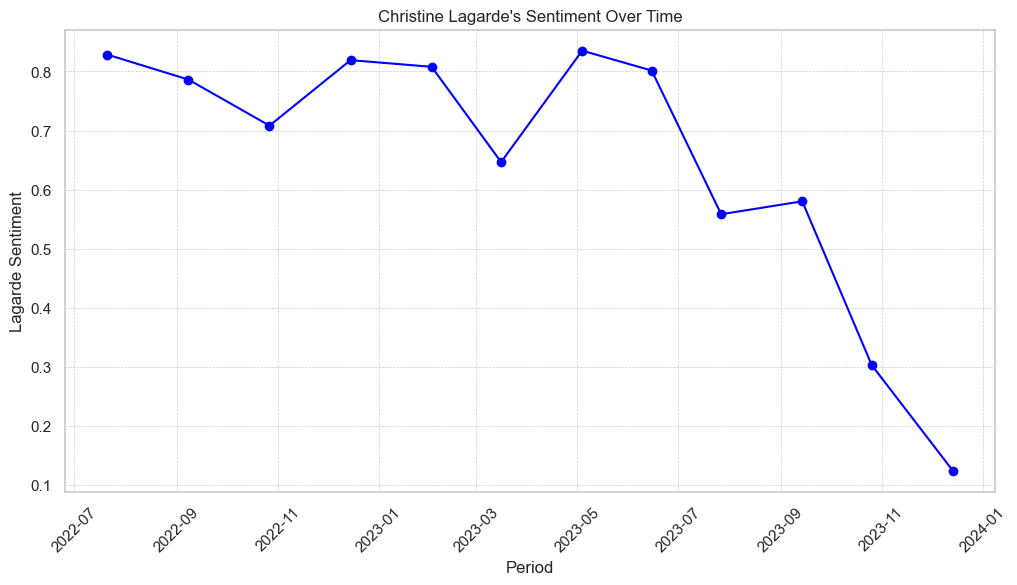

In [226]:
import matplotlib.pyplot as plt

# Plot Christine Lagarde's sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(lagarde_sentiment['Period'], lagarde_sentiment['Lagarde_Sentiment'], marker='o', color='blue')
plt.title("Christine Lagarde's Sentiment Over Time")
plt.xlabel("Period")
plt.ylabel("Lagarde Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


In [227]:
# Merge Lagarde's sentiment with the combined_result dataframe
combined_result_with_lagarde = pd.merge(combined_result, lagarde_sentiment, on='Period', how='left')

# Calculate the absolute difference for each governor's sentiment compared to Lagarde's sentiment
combined_result_with_lagarde['Discordance'] = abs(combined_result_with_lagarde['Sentiment_Per_Speaker'] - combined_result_with_lagarde['Lagarde_Sentiment'])

# Group by Name_of_Speaker and Period to calculate statistics
discordance_stats = combined_result_with_lagarde.groupby(['Name_of_Speaker', 'Period']).agg({
    'Discordance': ['mean', 'min', 'max', 'std']
}).reset_index()

# Flatten the multi-level columns
discordance_stats.columns = ['Name_of_Speaker', 'Period', 'Mean_Discordance', 'Min_Discordance', 'Max_Discordance', 'Std_Discordance']

discordance_stats

Name_of_Speaker     Period  Mean_Discordance  Min_Discordance  \
0         Boris Vujcic 2022-12-15          0.180905         0.180905   
1         Boris Vujcic 2023-02-02          0.192190         0.192190   
2         Boris Vujcic 2023-03-16          0.281887         0.281887   
3         Boris Vujcic 2023-05-04          0.164873         0.164873   
4         Boris Vujcic 2023-06-15          0.198517         0.198517   
..                 ...        ...               ...              ...   
268  Yannis Stournaras 2023-06-15          0.461058         0.461058   
269  Yannis Stournaras 2023-07-27          0.499558         0.499558   
270  Yannis Stournaras 2023-09-14          0.556738         0.556738   
271  Yannis Stournaras 2023-10-26          0.063125         0.063125   
272  Yannis Stournaras 2023-12-14          0.427141         0.427141   

     Max_Discordance  Std_Discordance  
0           0.180905              NaN  
1           0.192190              NaN  
2           0.281887              NaN  
3           0.164873              NaN  
4           0.198517              NaN  
..               ...              ...  
268         0.461058              NaN  
269         0.499558              NaN  
270         0.556738              NaN  
271         0.063125              NaN  
272         0.427141              NaN  

[273 rows x 6 columns]

Difference positive or negative

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


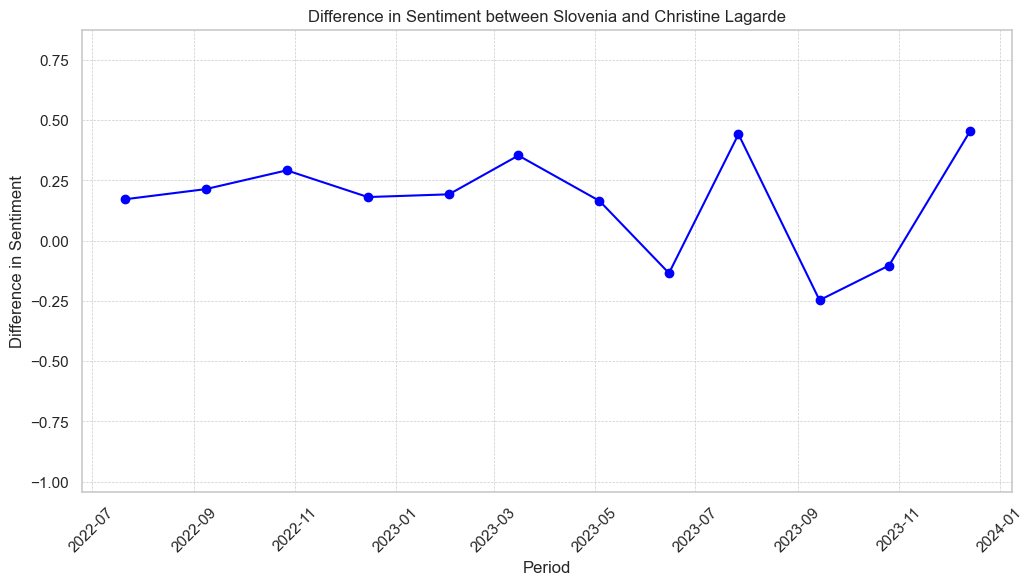

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


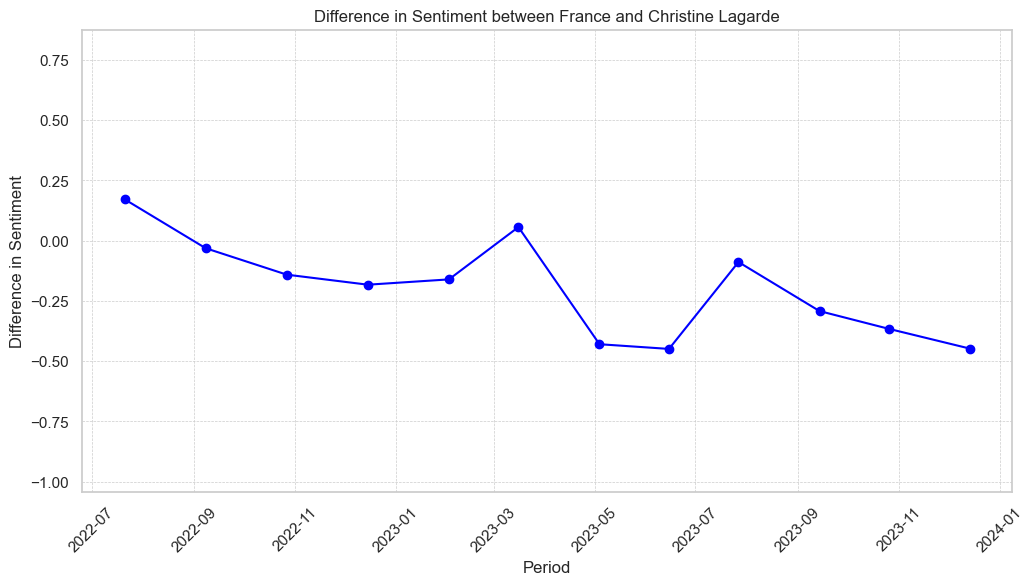

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


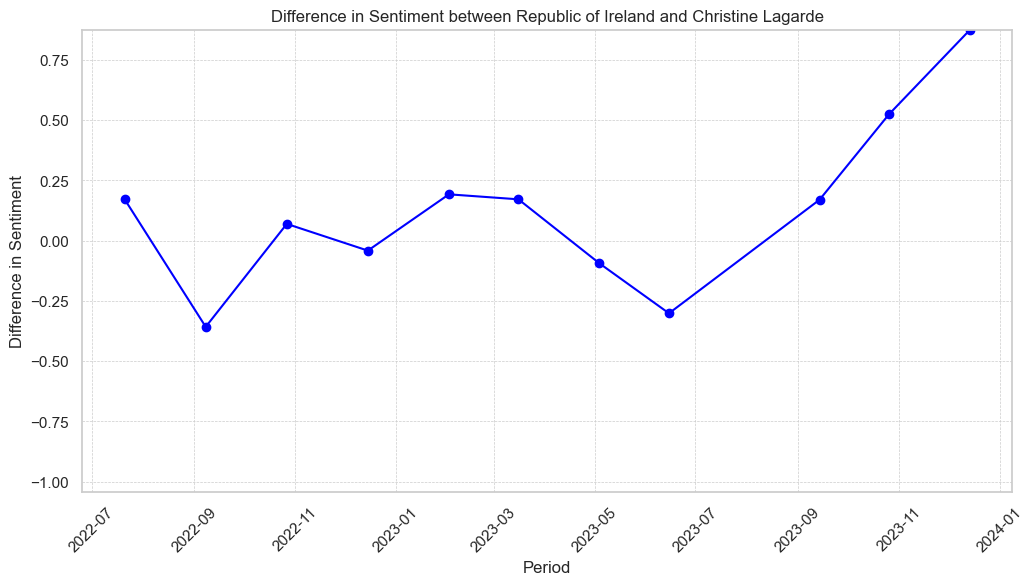

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


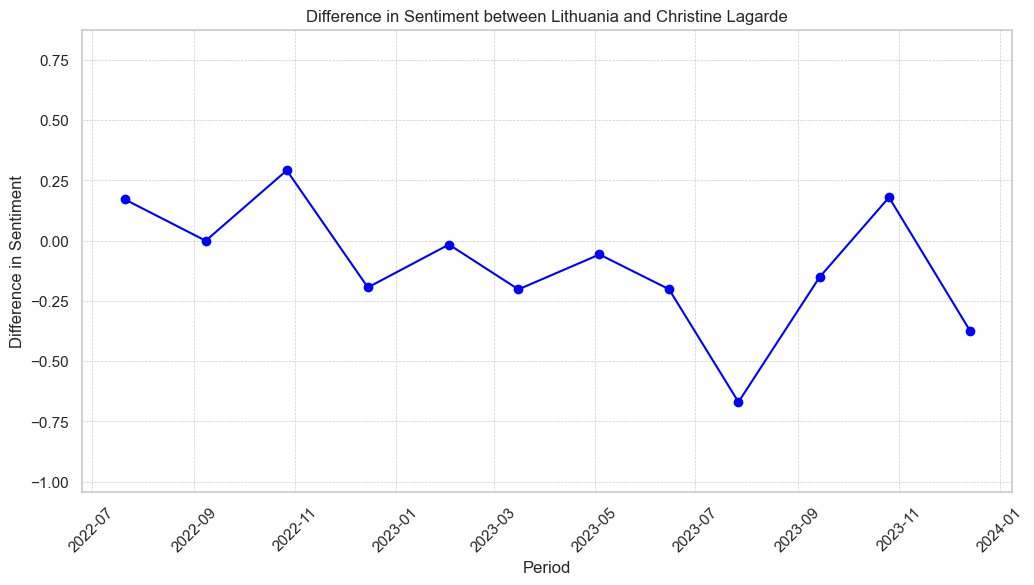

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


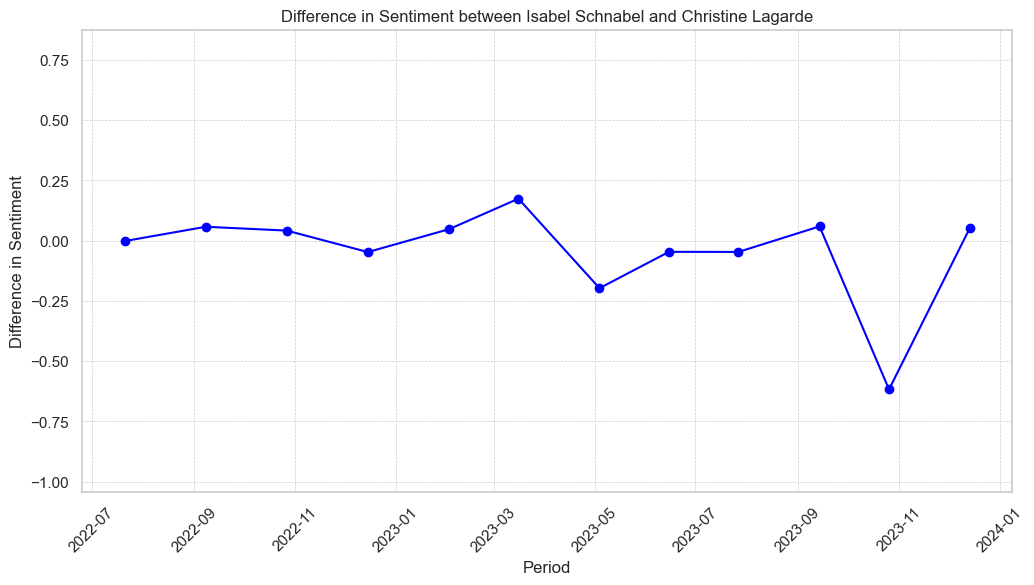

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


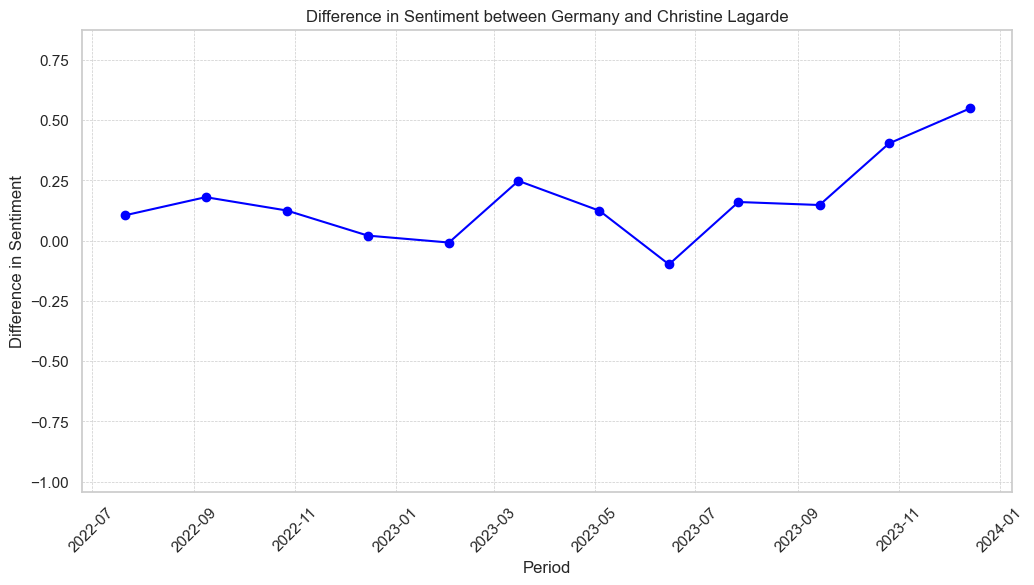

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


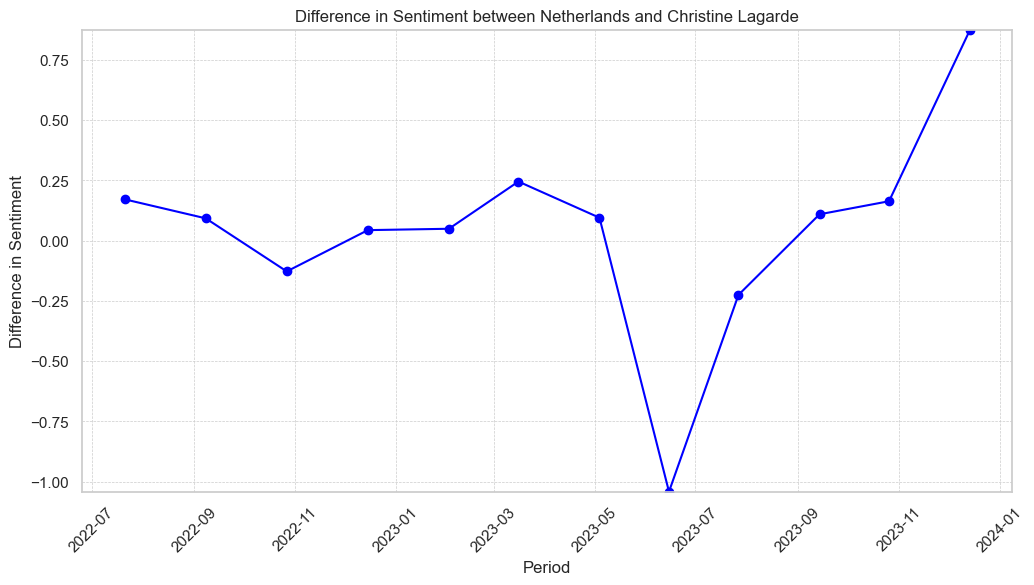

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


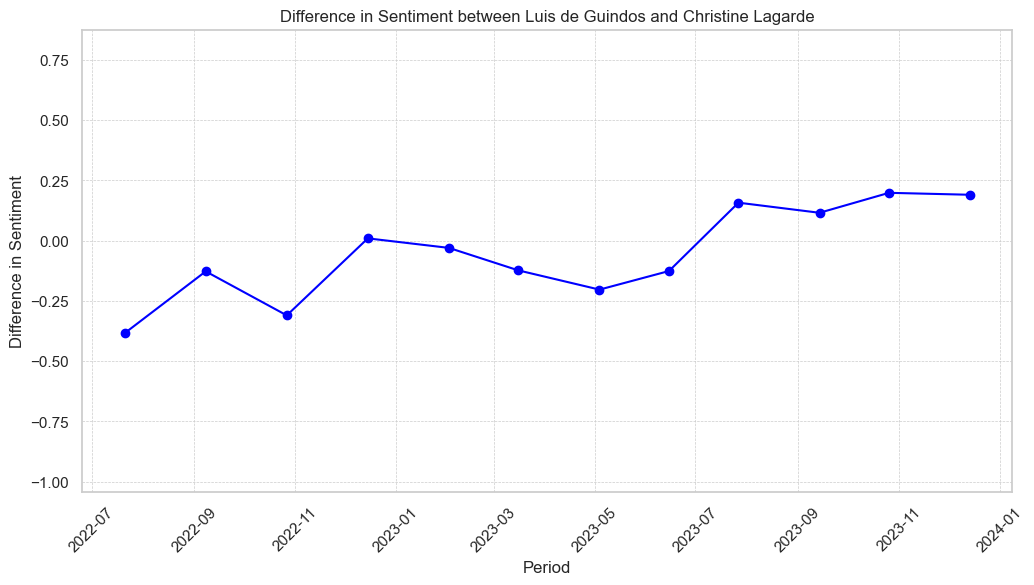

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


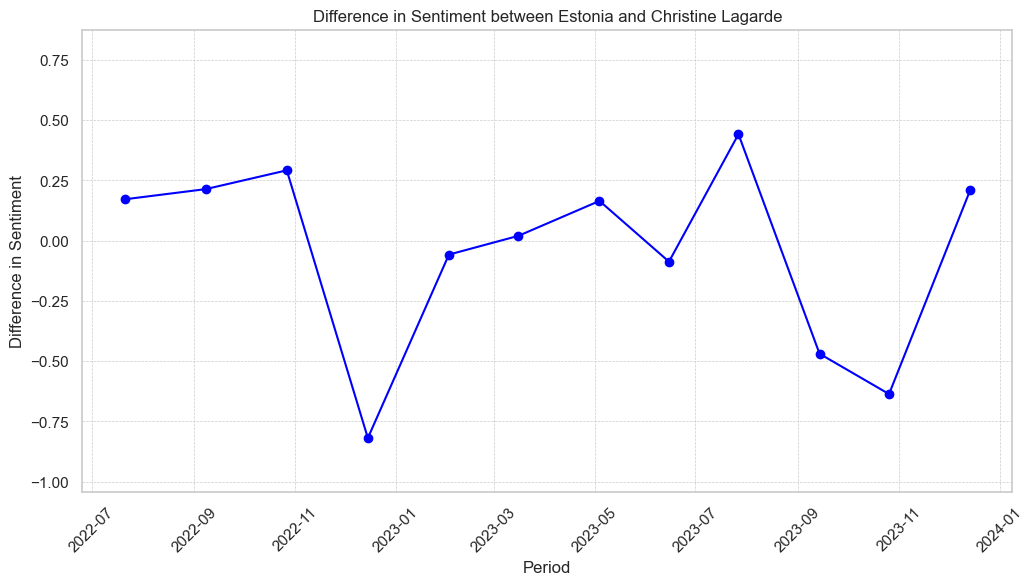

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


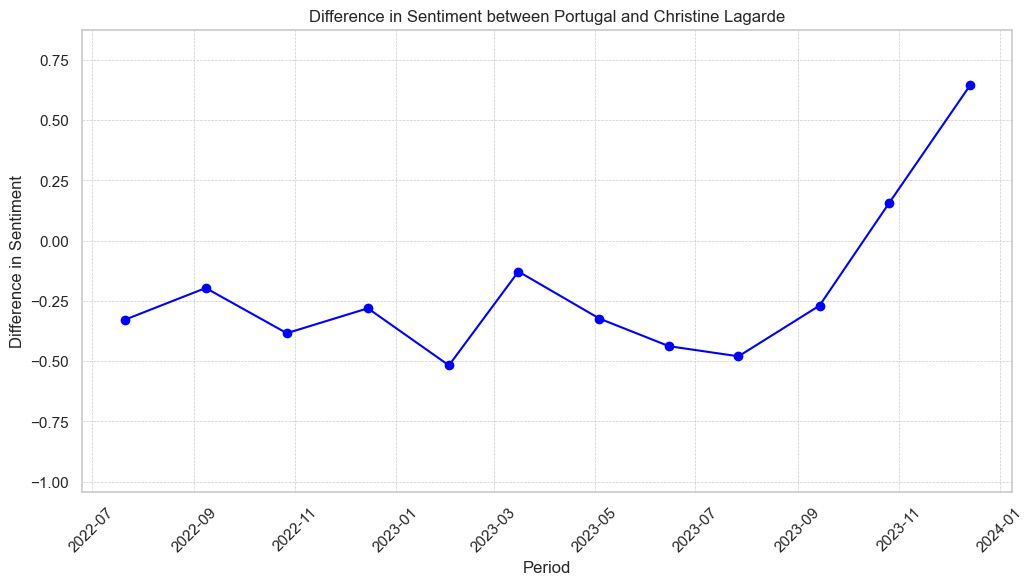

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


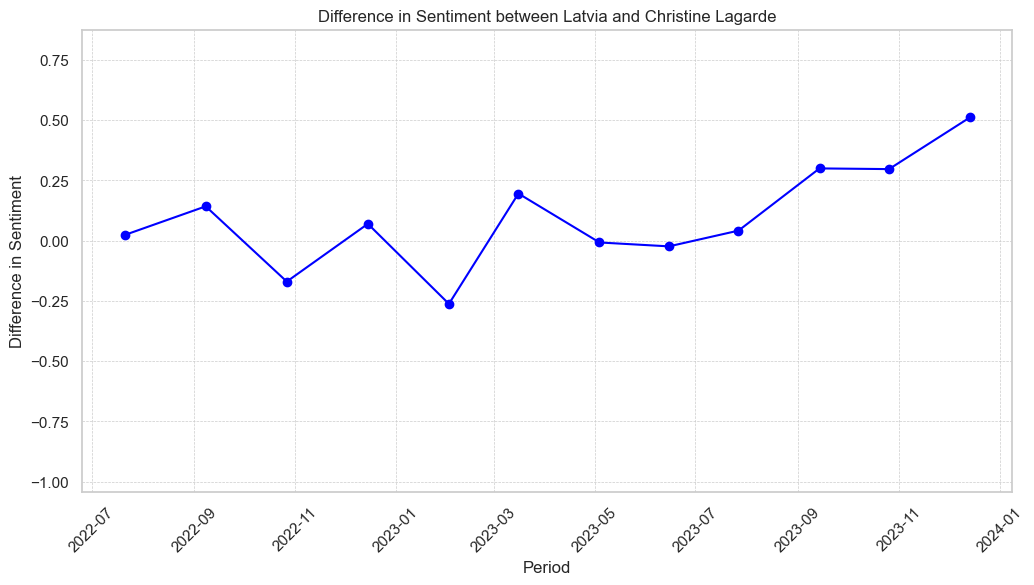

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


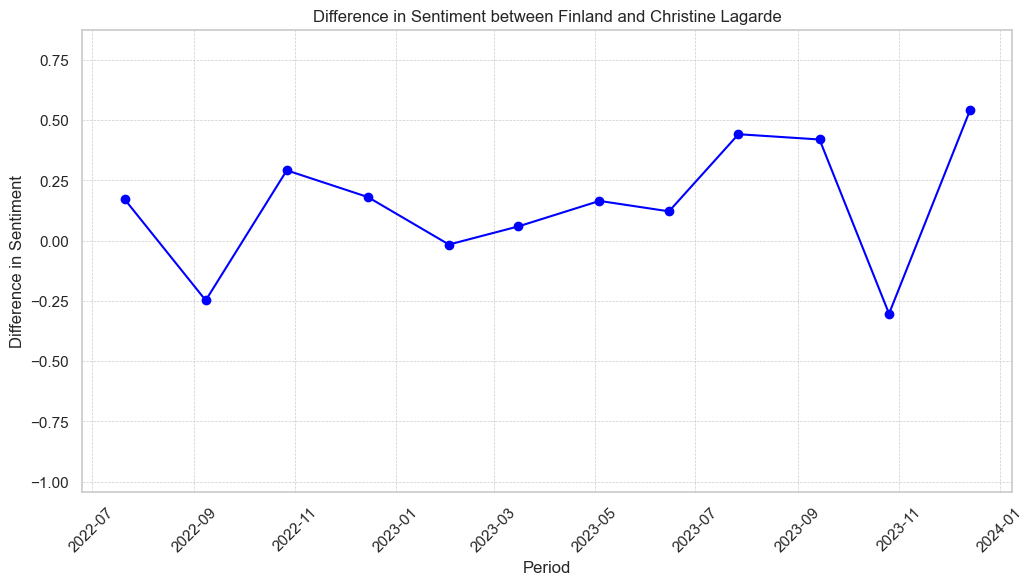

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


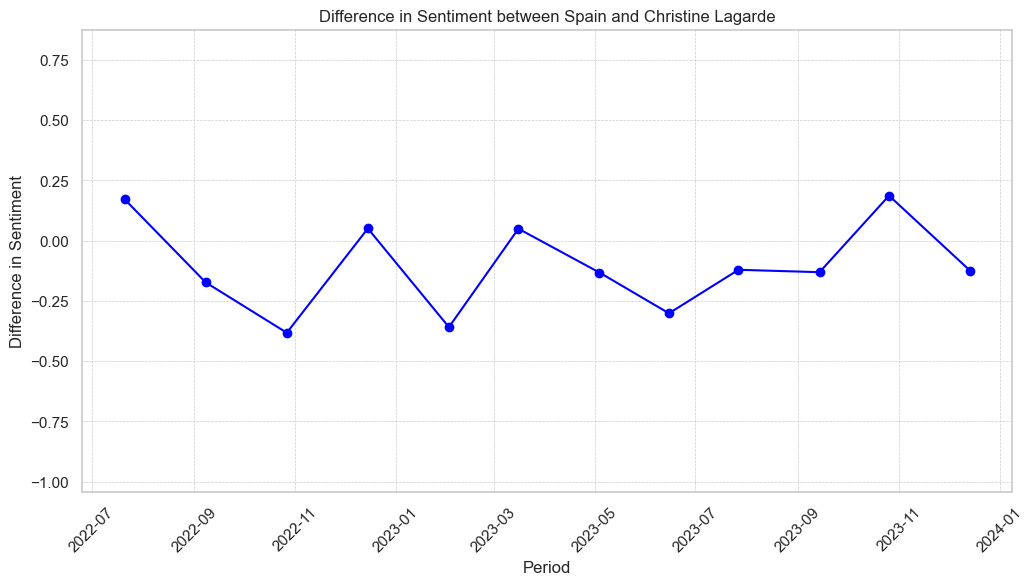

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


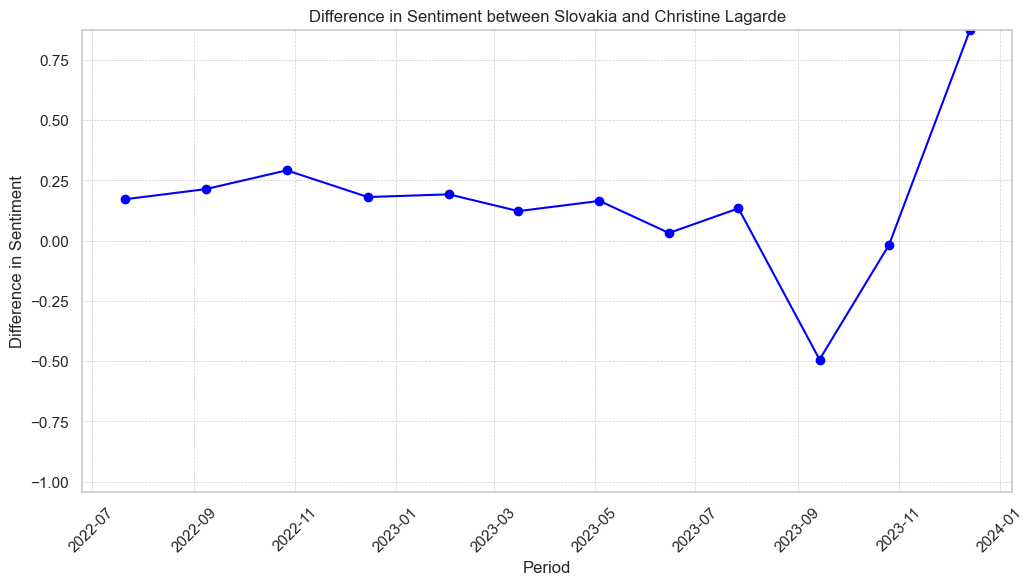

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


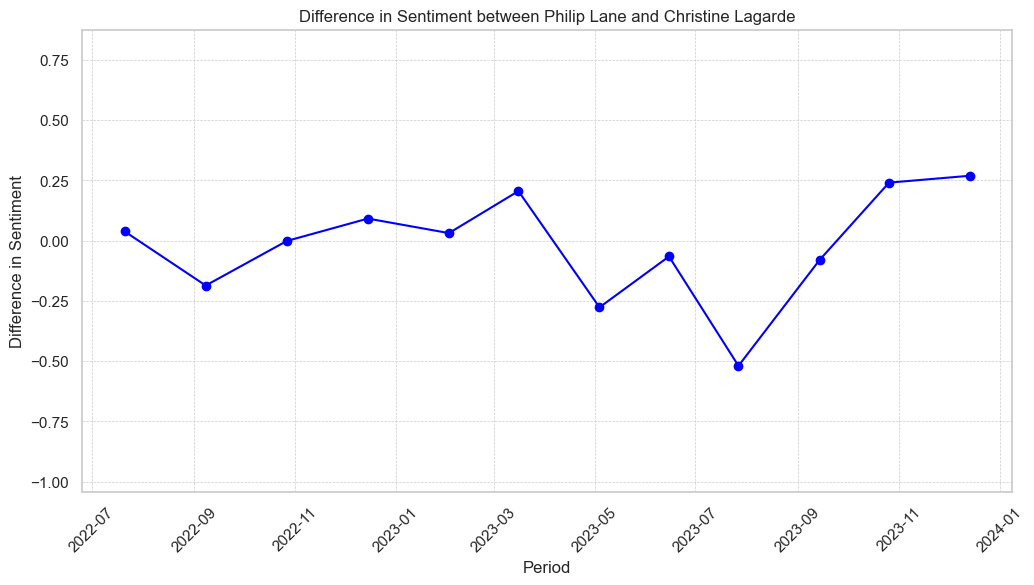

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


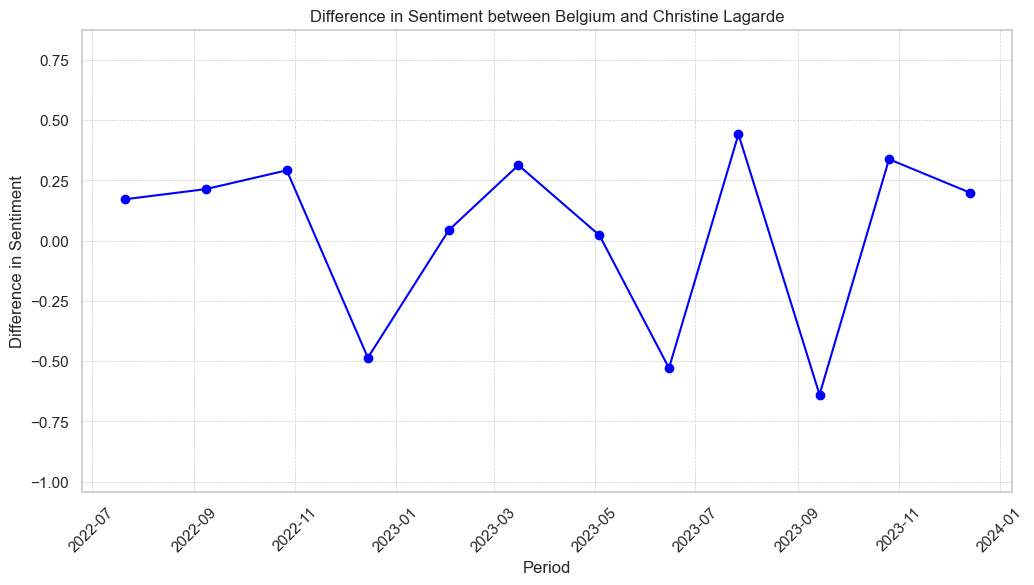

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


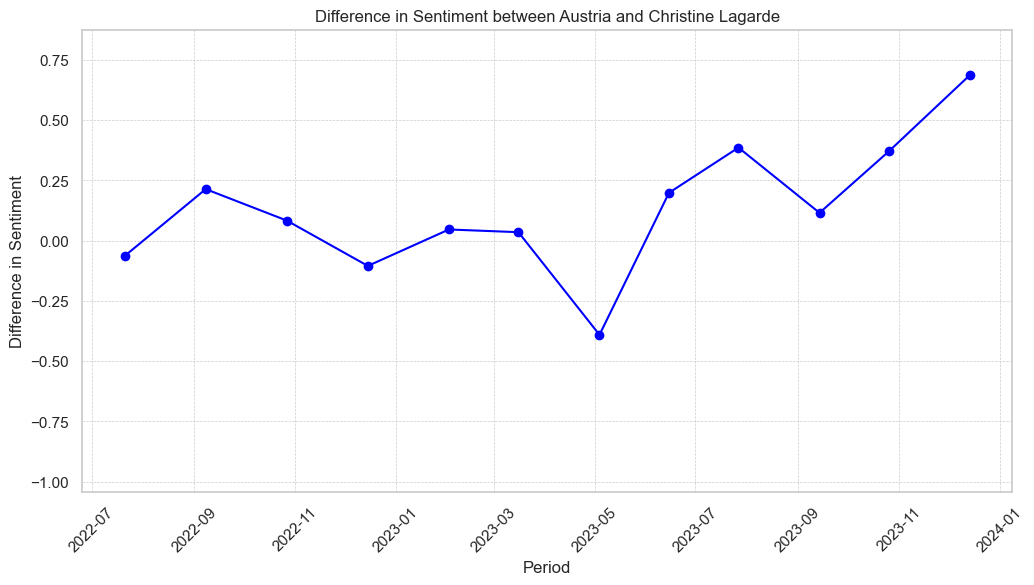

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


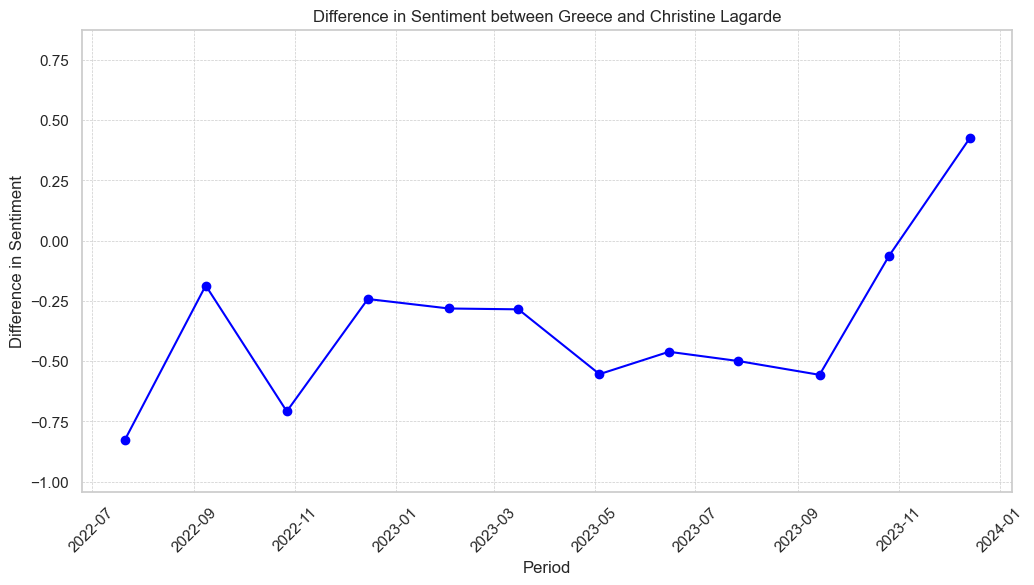

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


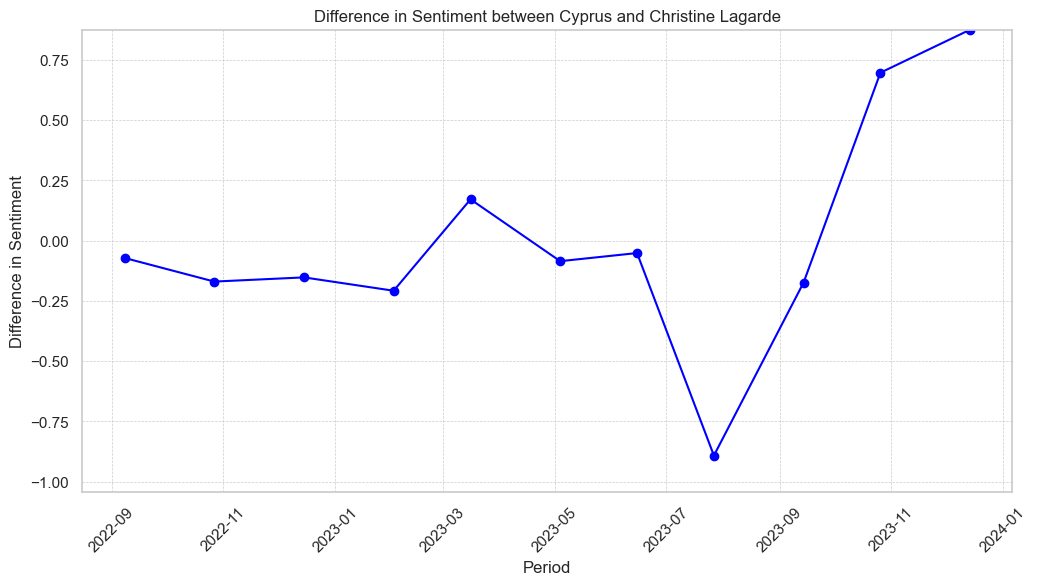

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


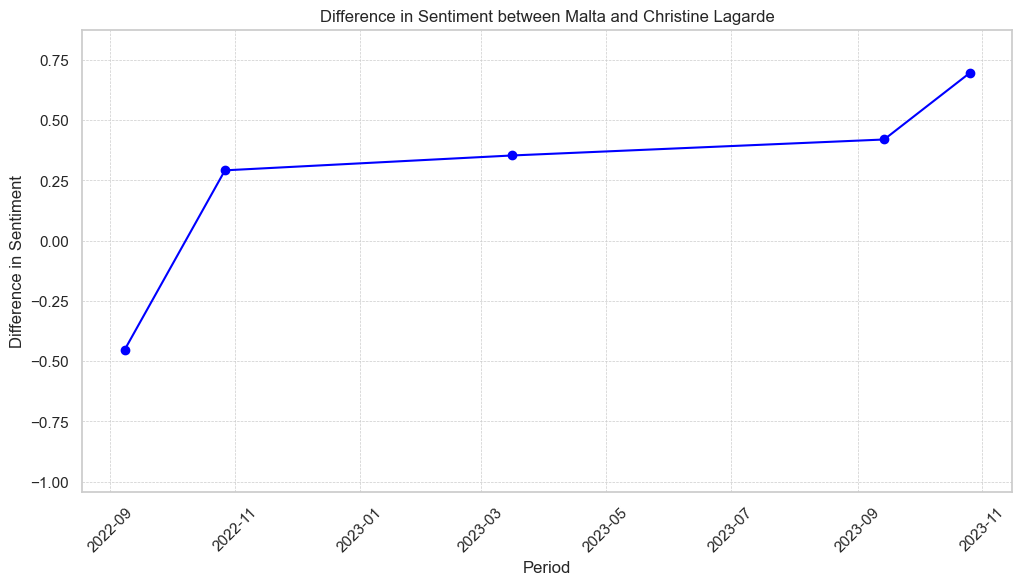

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


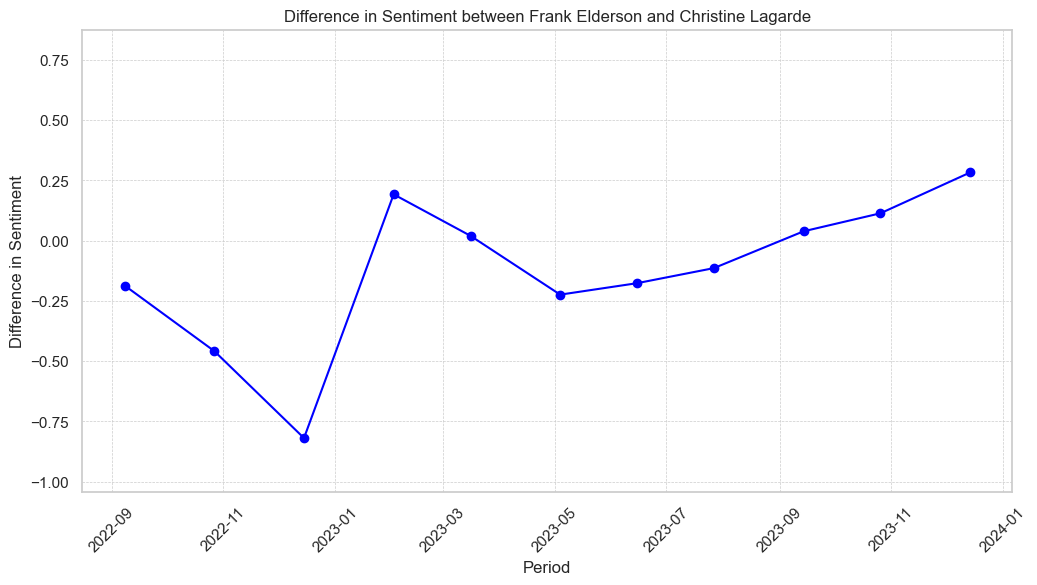

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


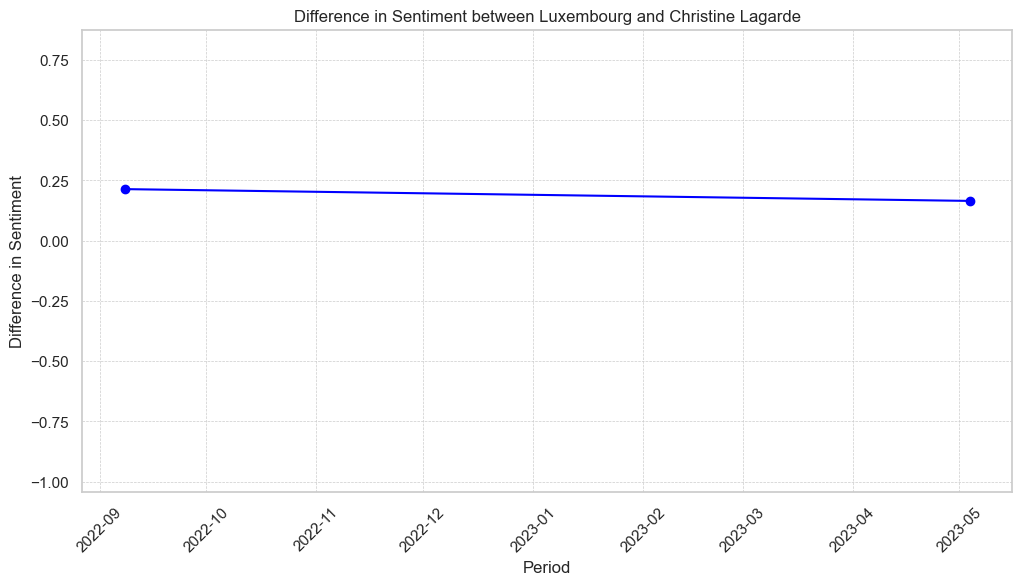

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


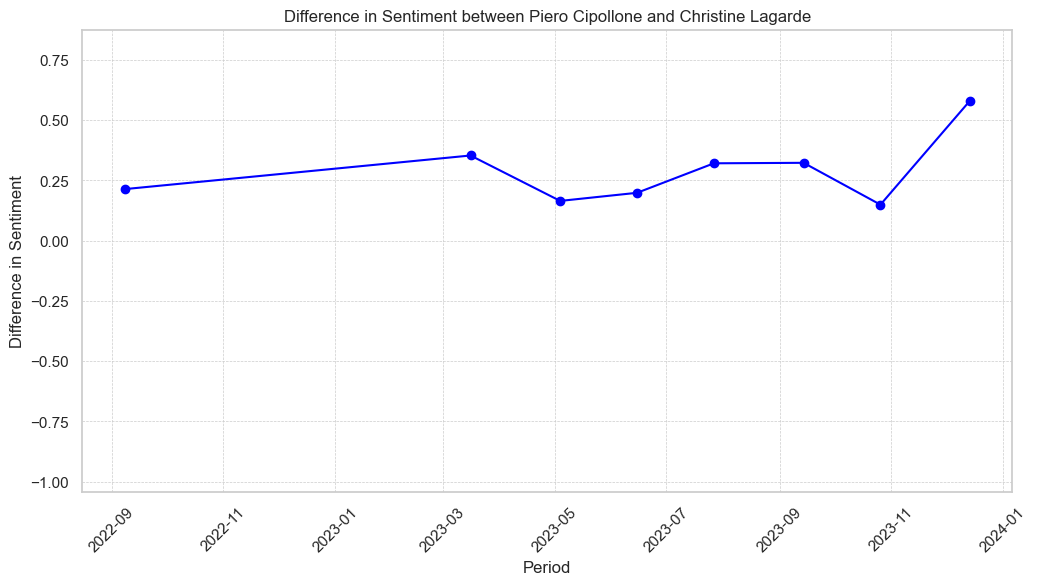

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


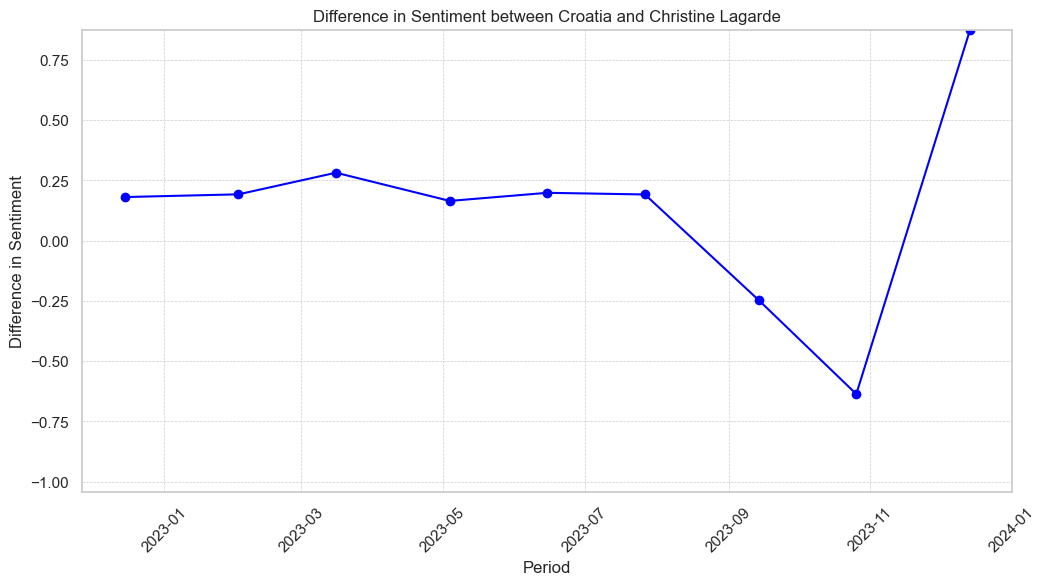

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\1851656538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']


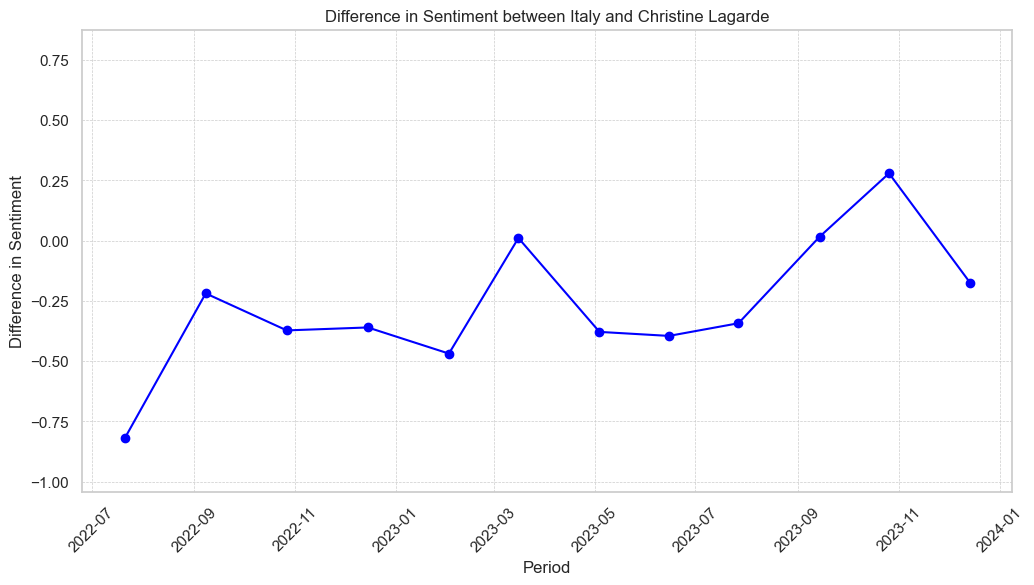

In [228]:
# Get the list of unique countries excluding Christine Lagarde
countries = combined_result_with_lagarde['Country'].unique()
countries = countries[countries != 'Christine Lagarde']

# Calculate the maximum and minimum differences across all countries to set consistent y-axis limits
min_diff = float('inf')
max_diff = float('-inf')
for country in countries:
    country_data = combined_result_with_lagarde[combined_result_with_lagarde['Country'] == country]
    differences = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']
    min_diff = min(min_diff, differences.min())
    max_diff = max(max_diff, differences.max())

# Plot each country's sentiment vs Lagarde's sentiment and the differences
for country in countries:
    country_data = combined_result_with_lagarde[combined_result_with_lagarde['Country'] == country]
    
    # Compute the differences
    country_data['Difference'] = country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']
    
    # Line plot of differences over time
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Period'], country_data['Difference'], marker='o', color='blue')
    plt.title(f"Difference in Sentiment between {country} and Christine Lagarde")
    plt.xlabel("Period")
    plt.ylabel("Difference in Sentiment")
    plt.ylim(min_diff, max_diff)  # Set the y-axis limit to ensure consistency
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45)
    plt.show()


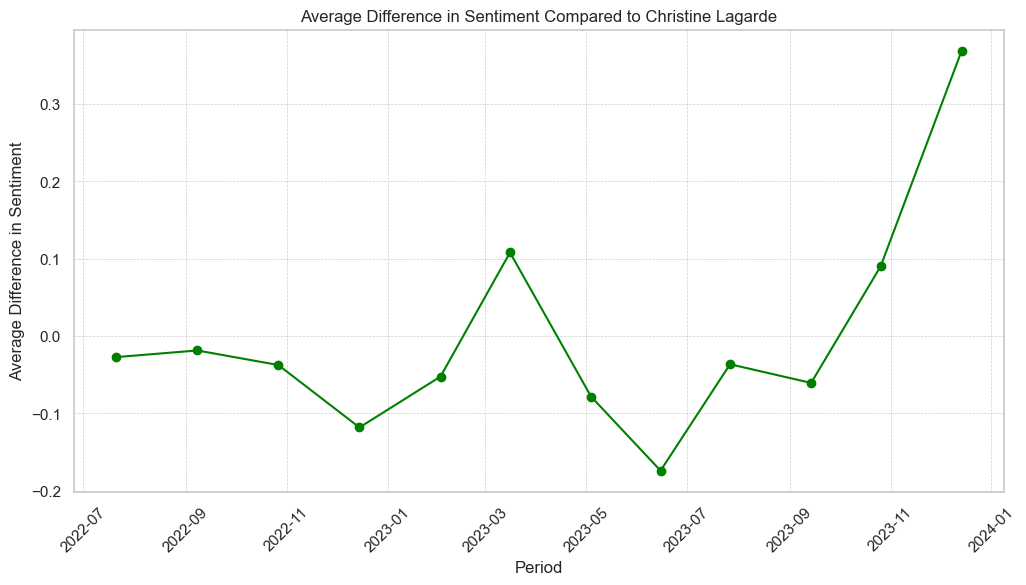

In [229]:
# Ensure the 'Period' column is in datetime format
combined_result_with_lagarde['Period'] = pd.to_datetime(combined_result_with_lagarde['Period'])

# Compute the differences for each country compared to Christine Lagarde
combined_result_with_lagarde['Difference'] = combined_result_with_lagarde['Sentiment_Per_Speaker'] - combined_result_with_lagarde['Lagarde_Sentiment']

# Calculate the average difference for each period
average_difference = combined_result_with_lagarde.groupby('Period')['Difference'].mean().reset_index()

# Plot the average difference in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_difference['Period'], average_difference['Difference'], marker='o', color='green')
plt.title("Average Difference in Sentiment Compared to Christine Lagarde")
plt.xlabel("Period")
plt.ylabel("Average Difference in Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\4103898817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_result['Difference'] = filtered_combined_result['Sentiment_Per_Speaker'] - filtered_combined_result['Lagarde_Sentiment']


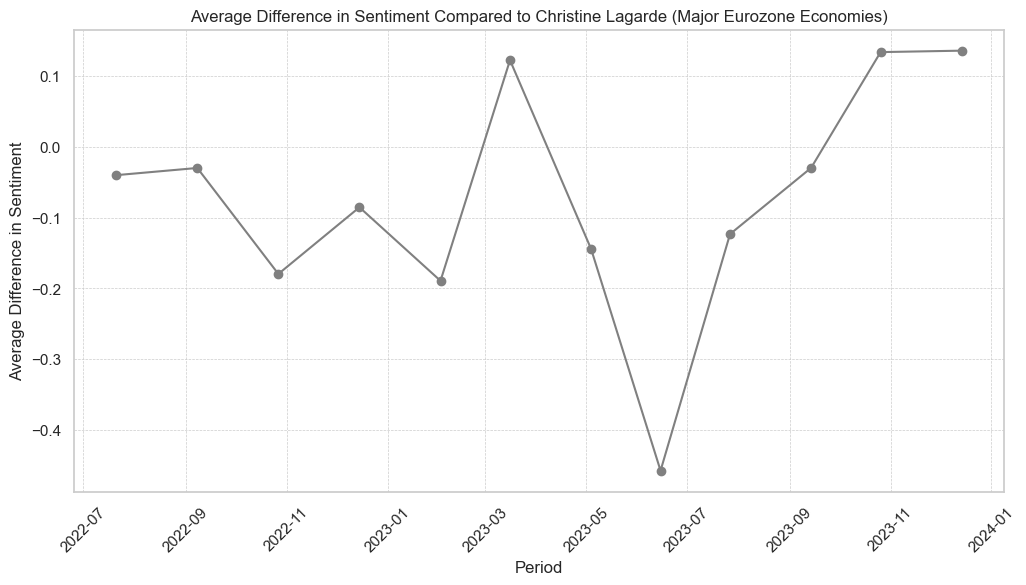

In [230]:
# List of major Eurozone economies
major_economies = ['France', 'Germany', 'Italy', 'Spain', 'Netherlands']

# Filter the DataFrame to include only the major Eurozone economies
filtered_combined_result = combined_result_with_lagarde[combined_result_with_lagarde['Country'].isin(major_economies)]

# Compute the differences for each country compared to Christine Lagarde
filtered_combined_result['Difference'] = filtered_combined_result['Sentiment_Per_Speaker'] - filtered_combined_result['Lagarde_Sentiment']

# Calculate the average difference for each period
average_difference = filtered_combined_result.groupby('Period')['Difference'].mean().reset_index()

# Plot the average difference in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_difference['Period'], average_difference['Difference'], marker='o', color='grey')
plt.title("Average Difference in Sentiment Compared to Christine Lagarde (Major Eurozone Economies)")
plt.xlabel("Period")
plt.ylabel("Average Difference in Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


# Absolute Differences Vs Largarde

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


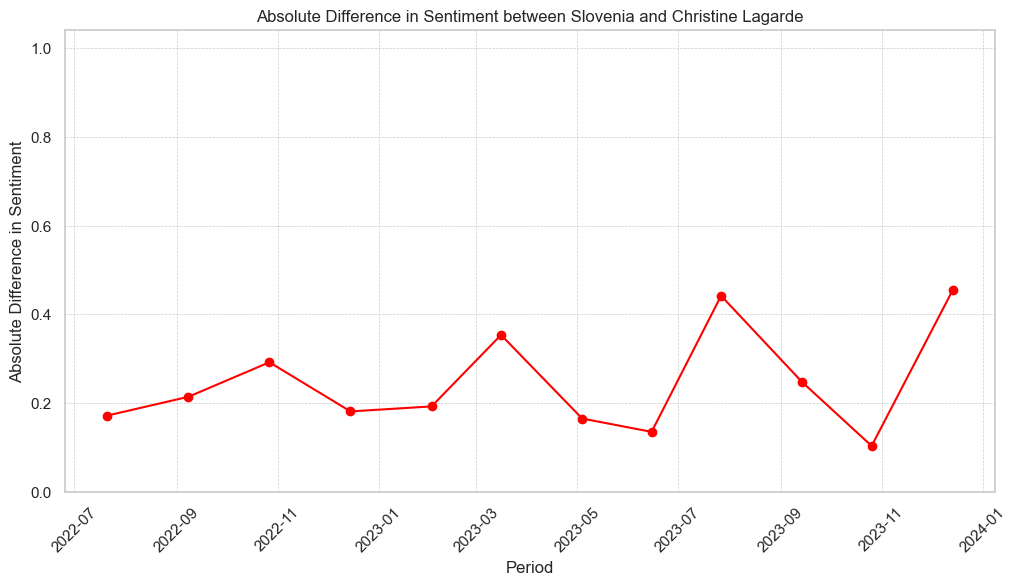

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


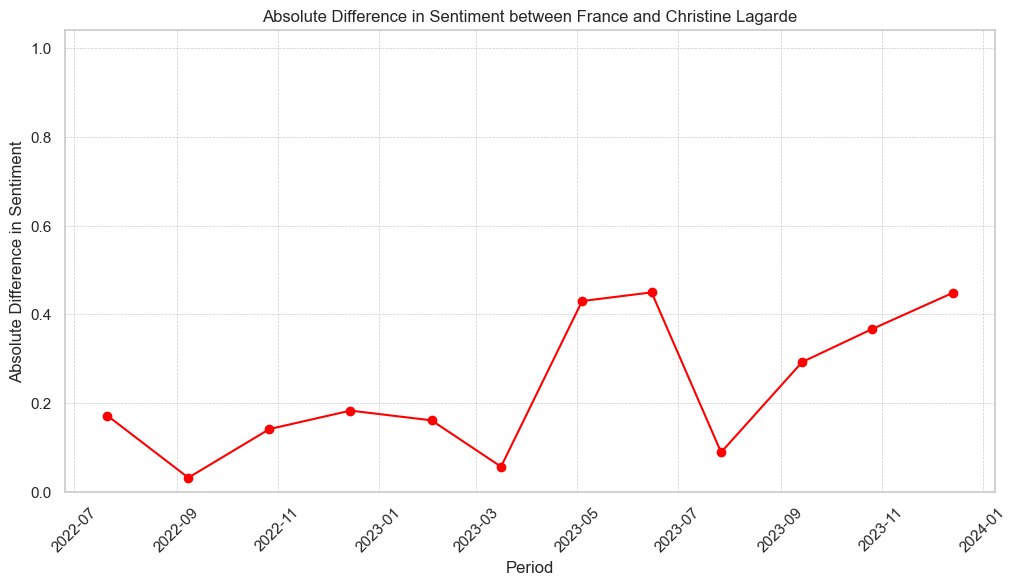

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


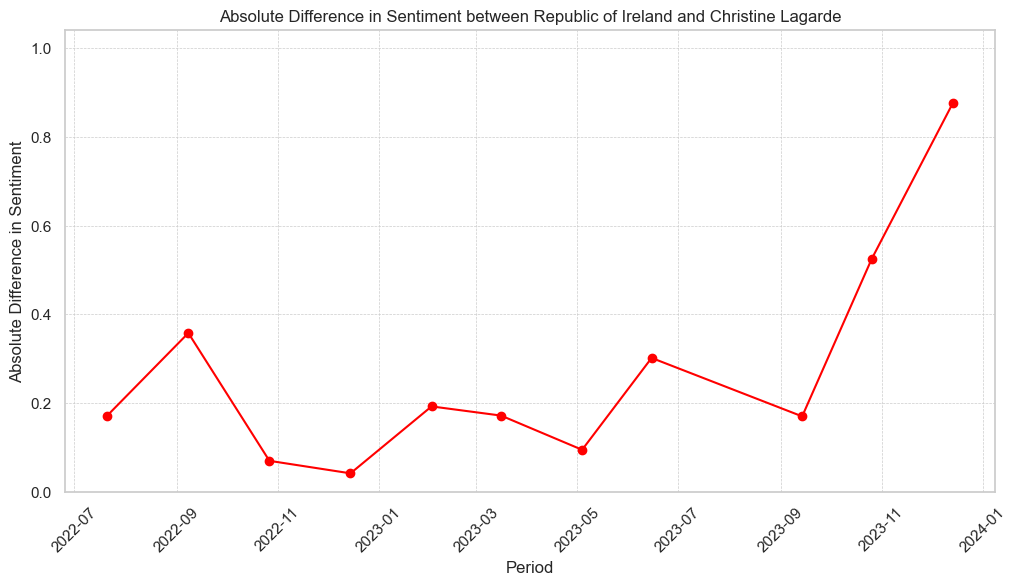

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


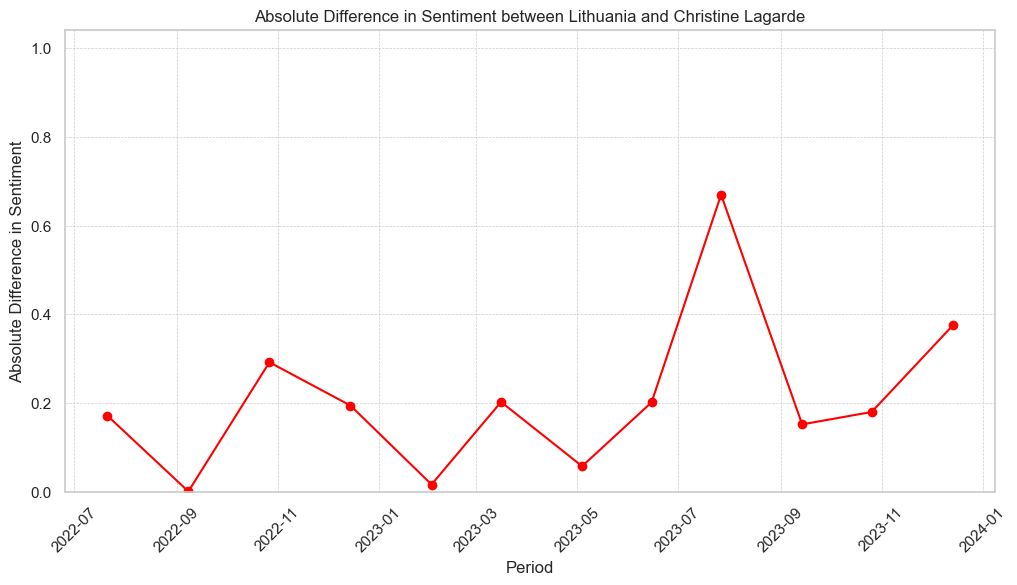

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


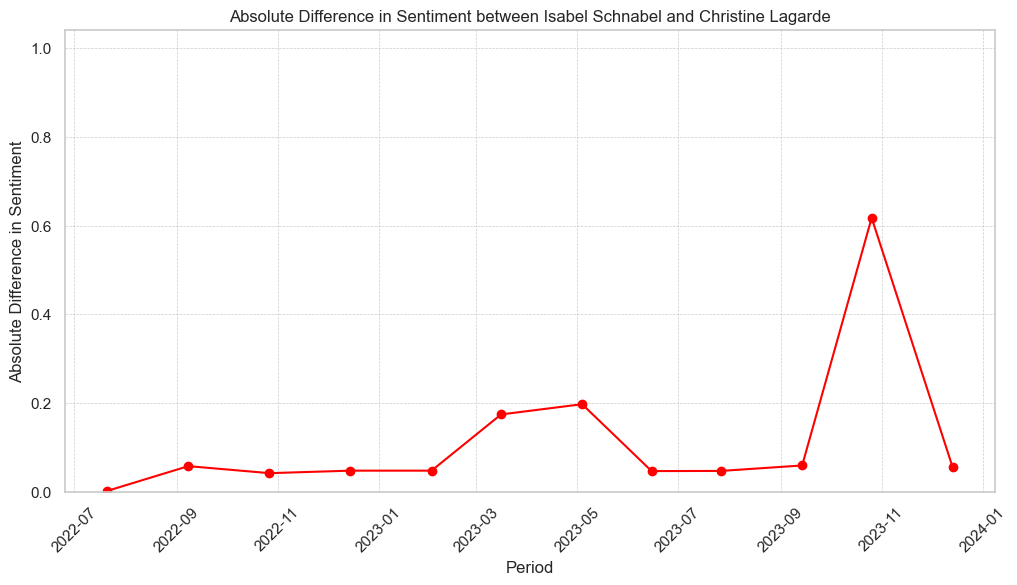

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


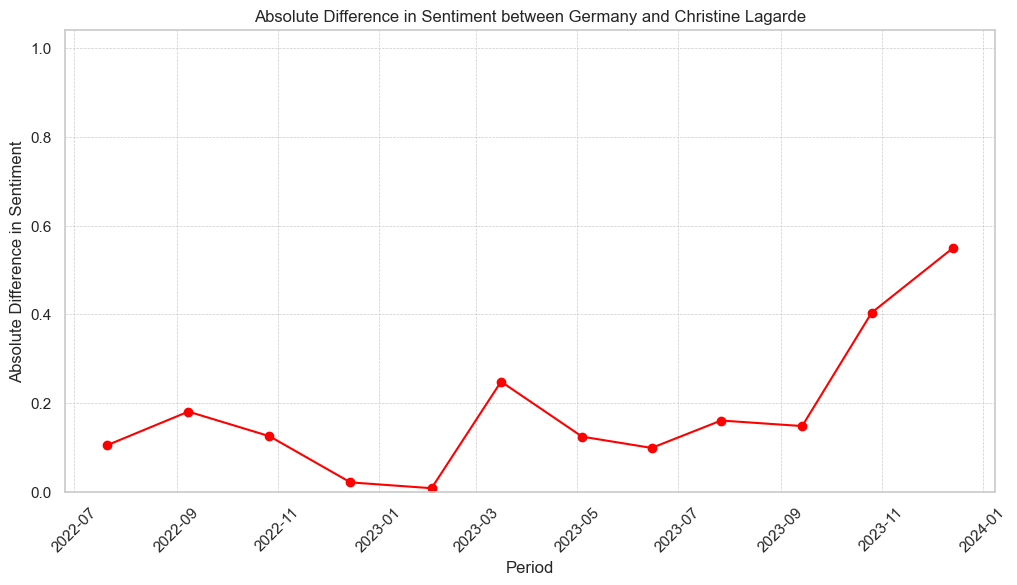

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


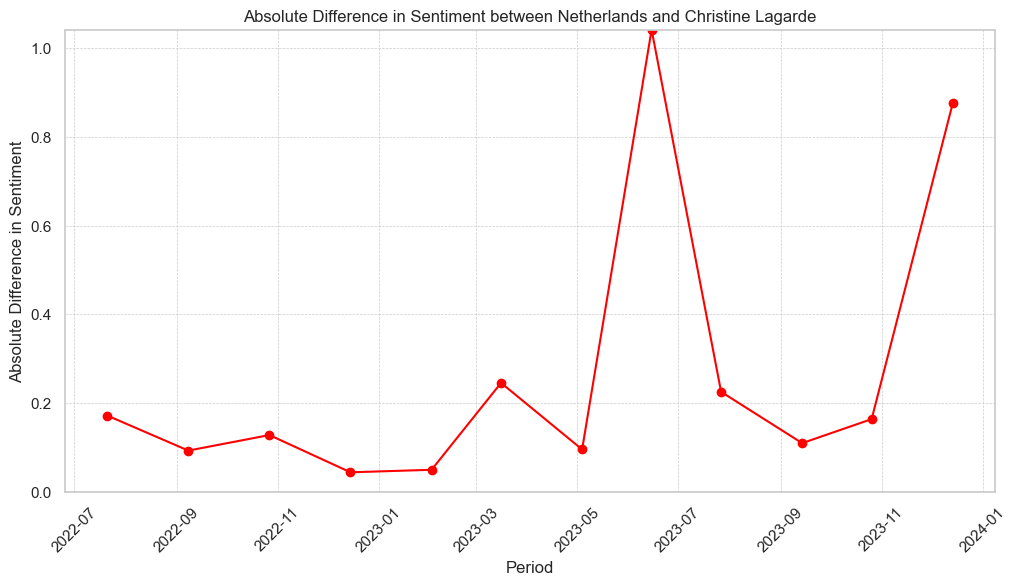

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


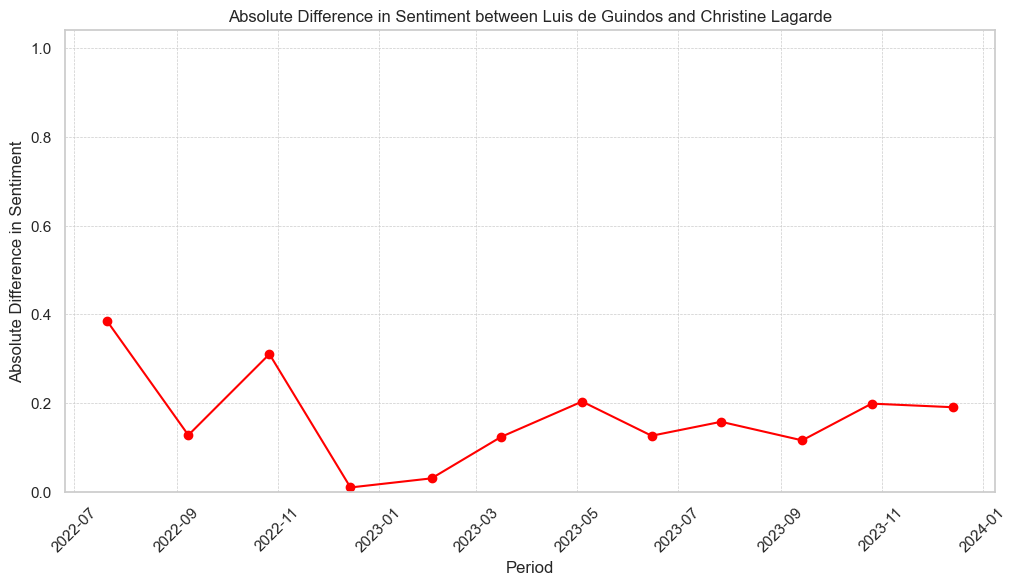

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


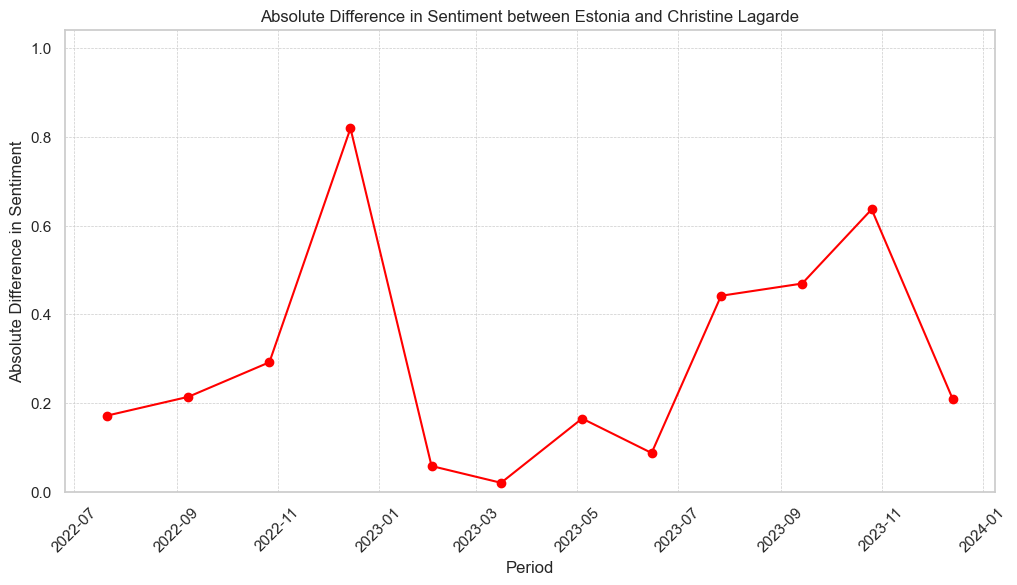

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


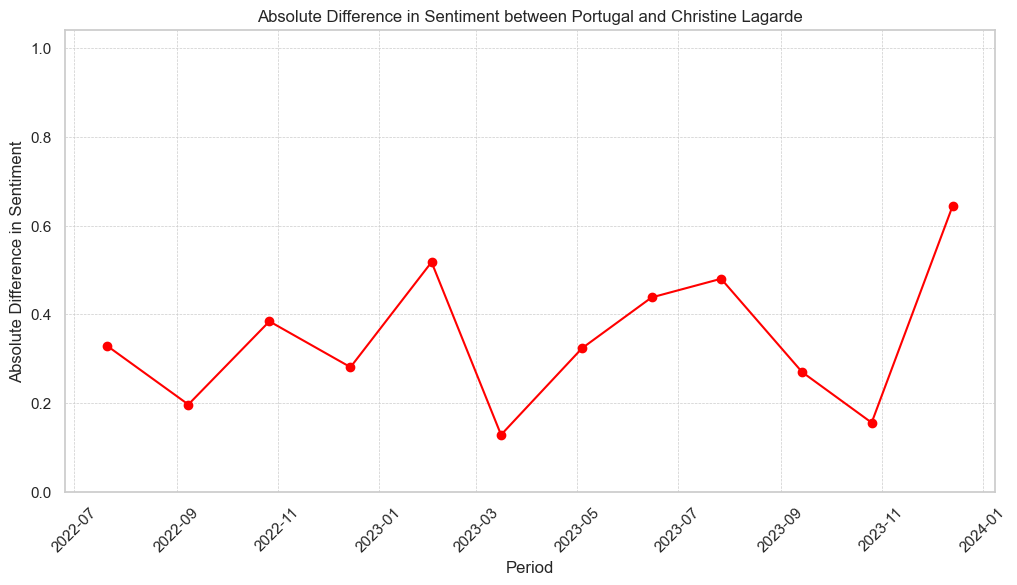

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


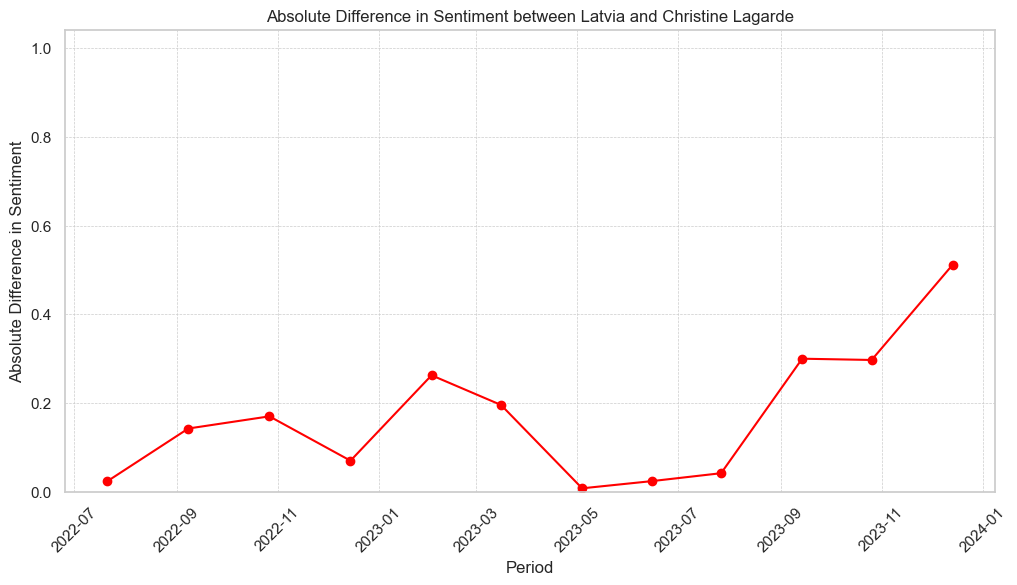

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


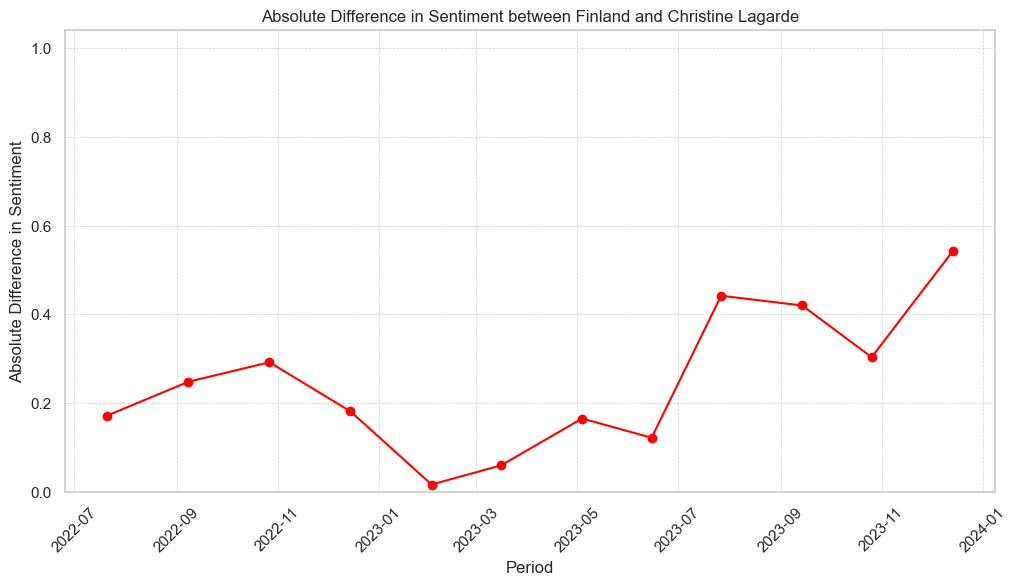

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


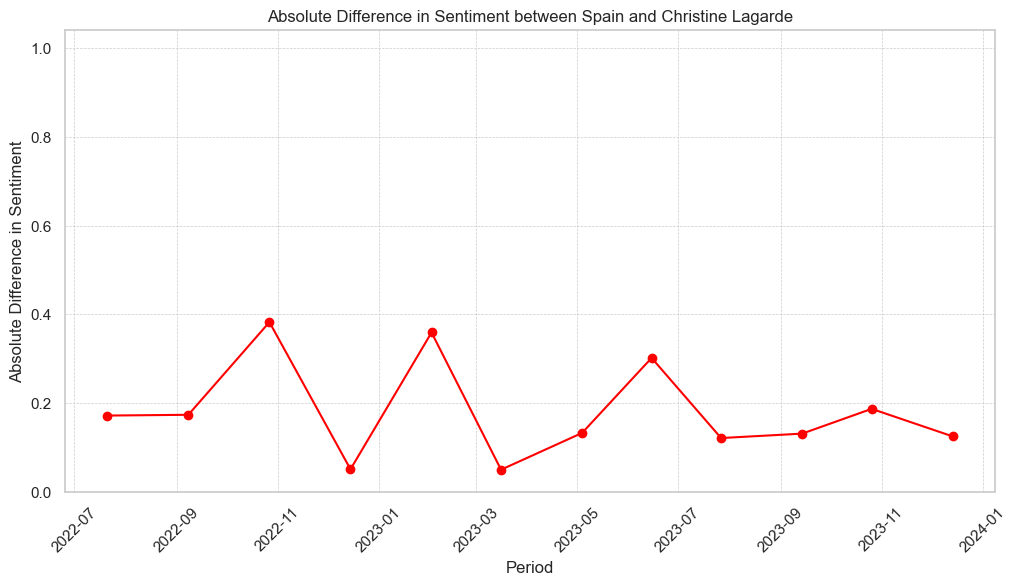

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


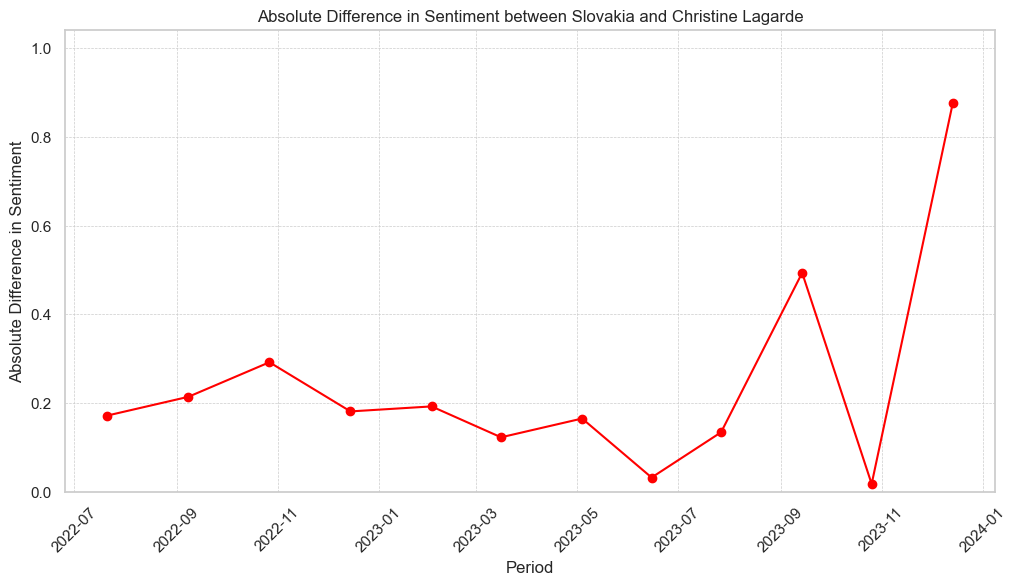

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


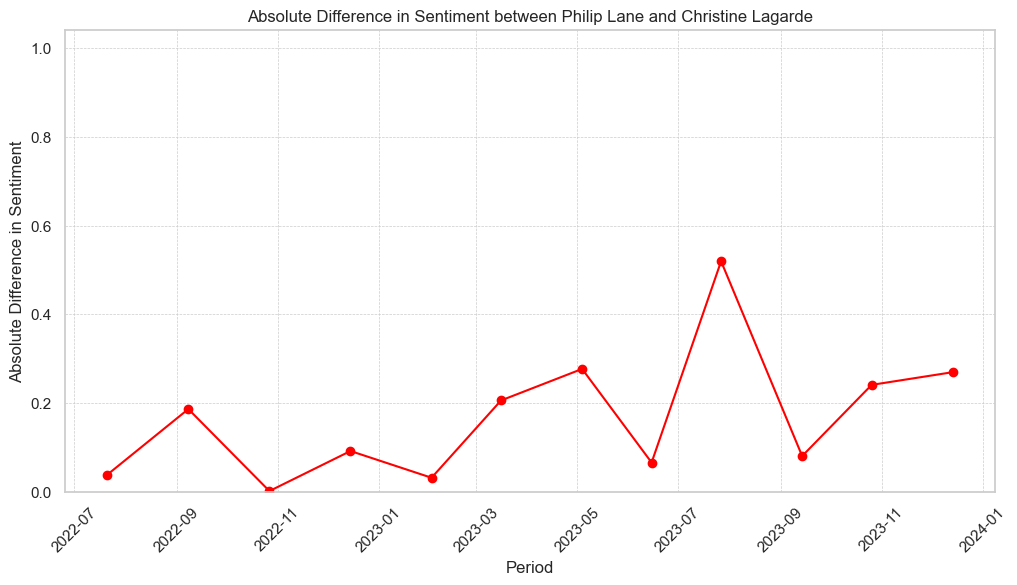

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


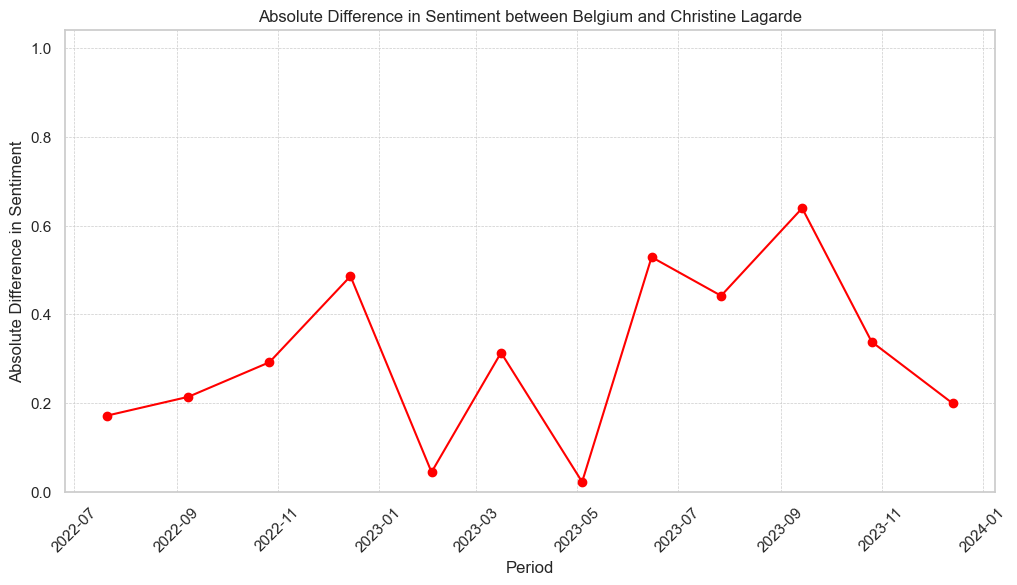

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


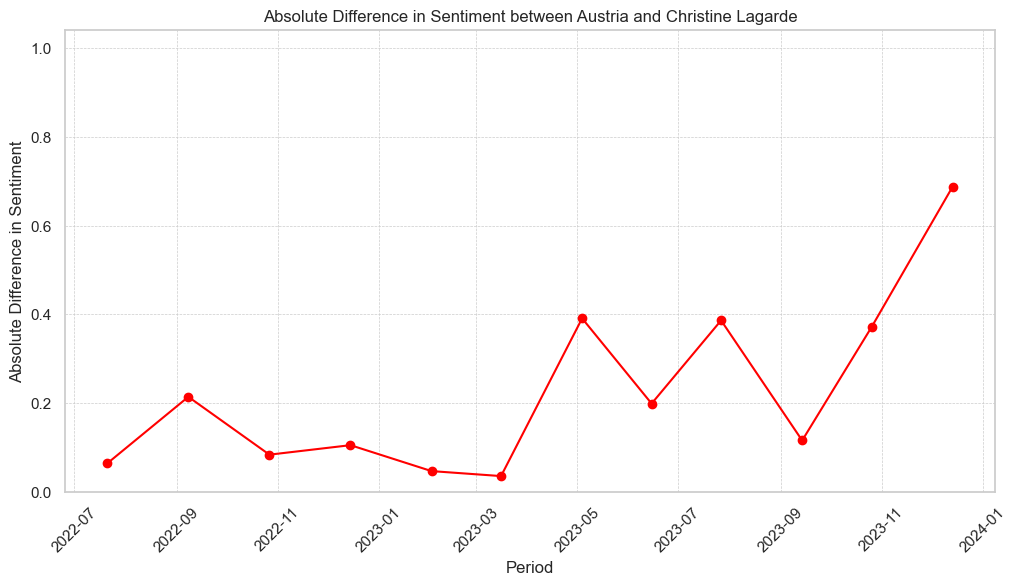

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


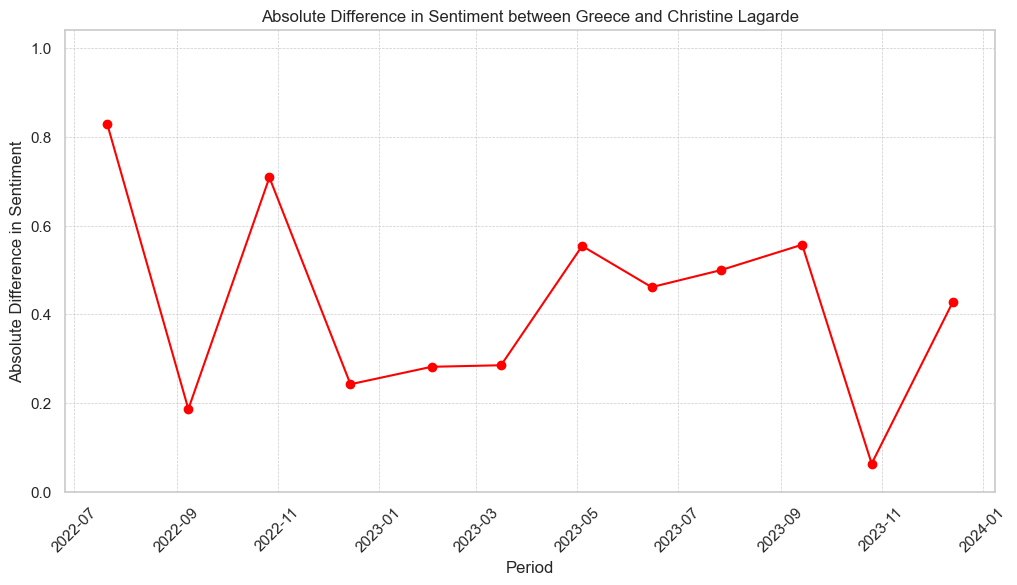

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


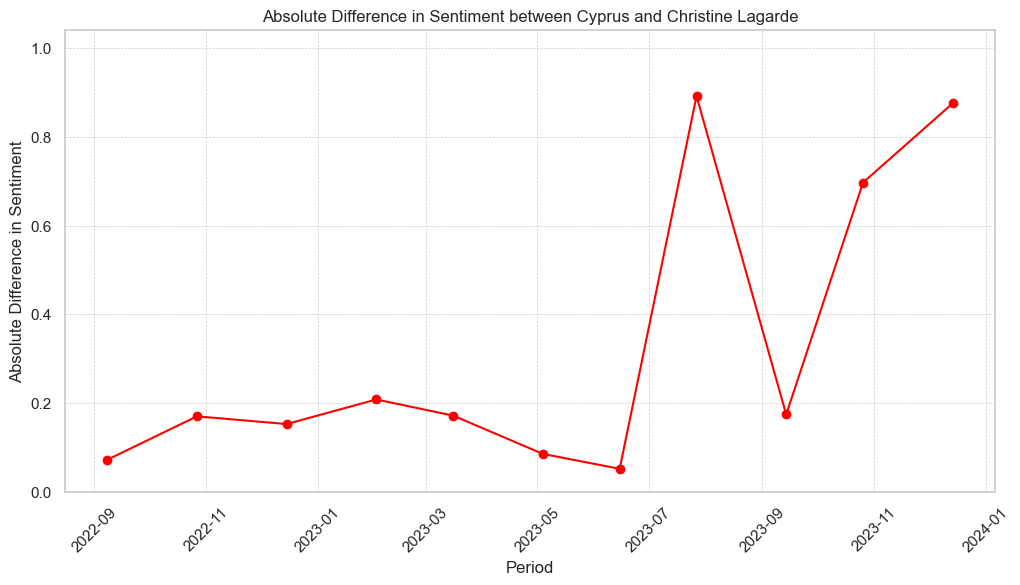

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


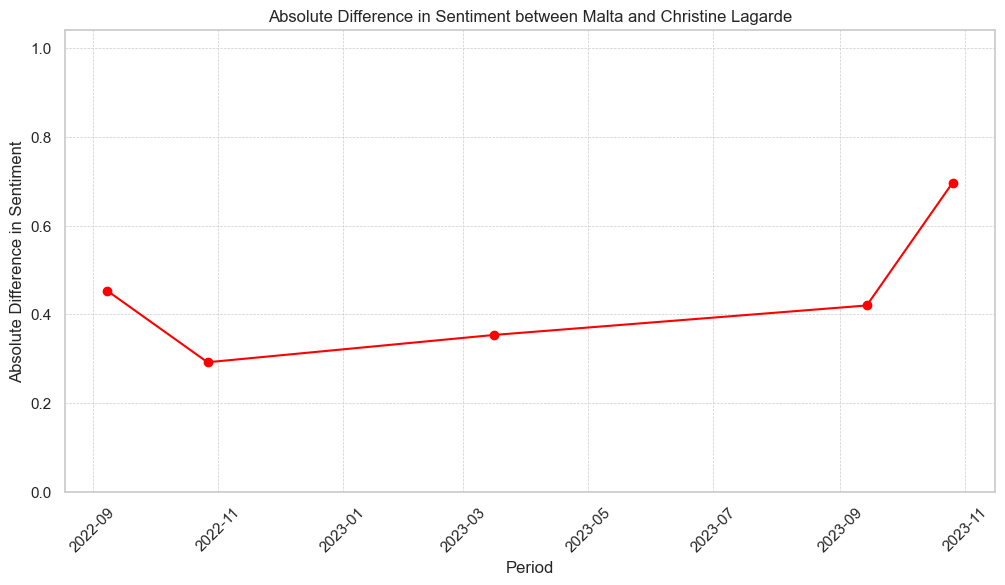

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


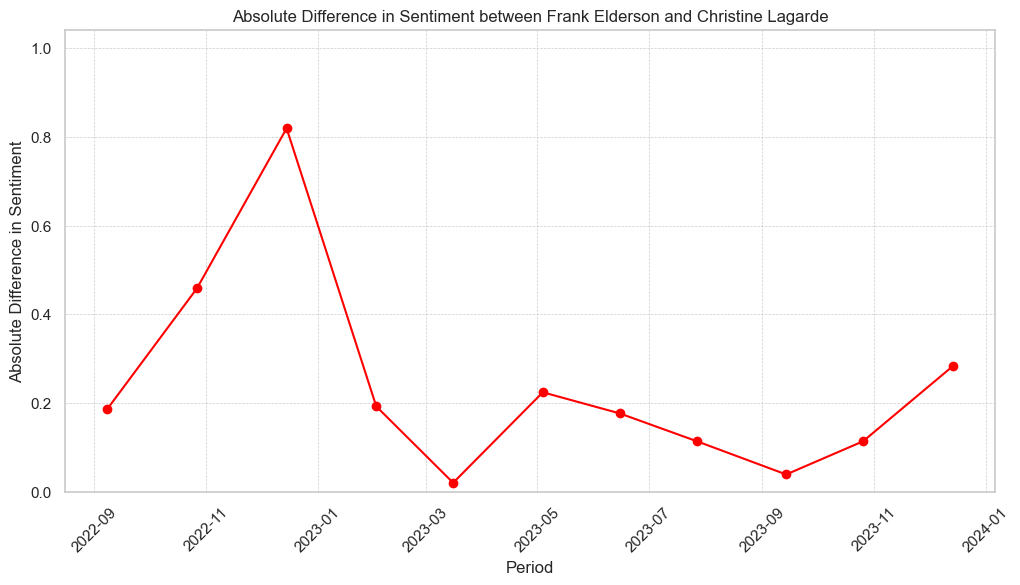

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


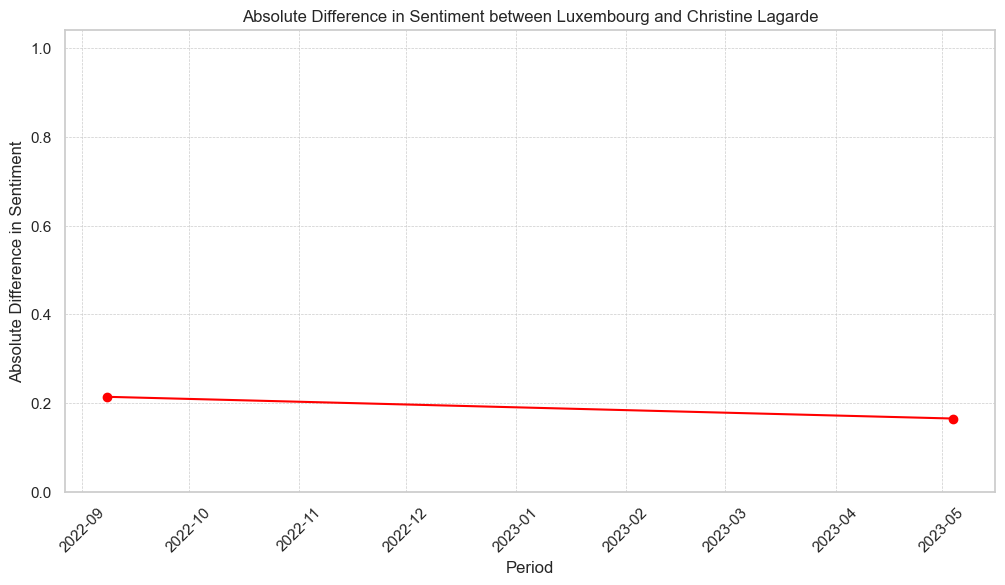

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


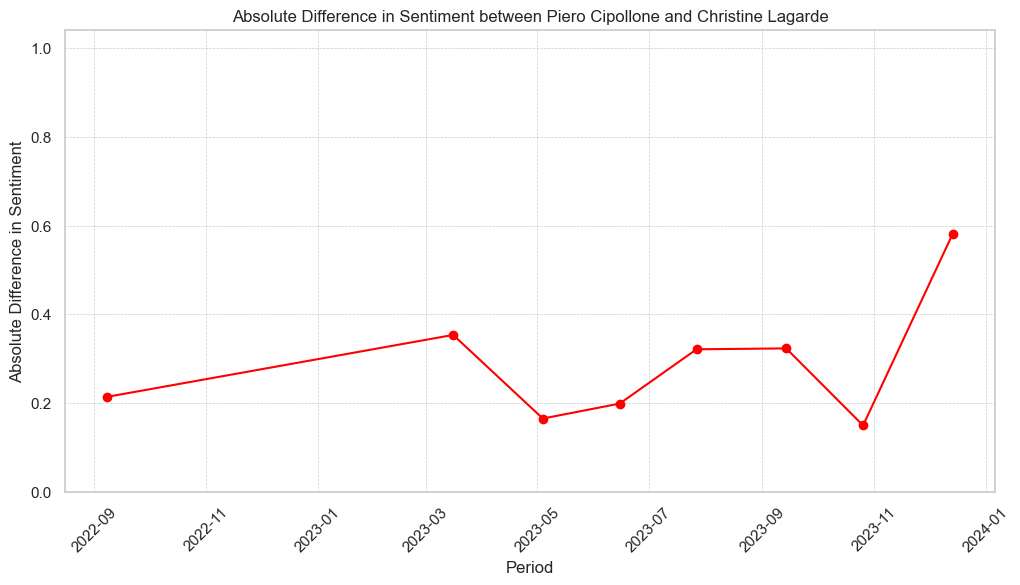

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


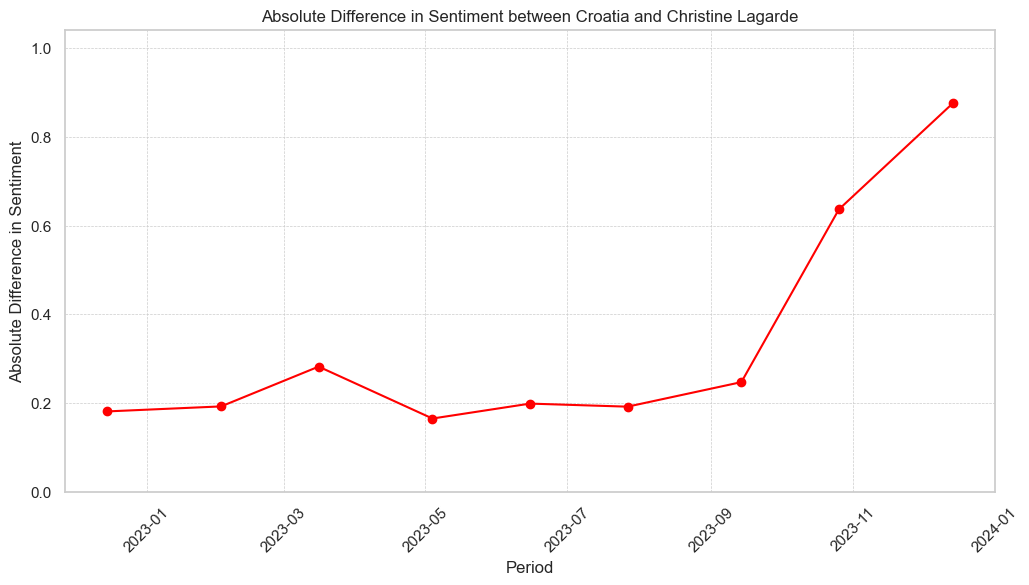

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3181480234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])


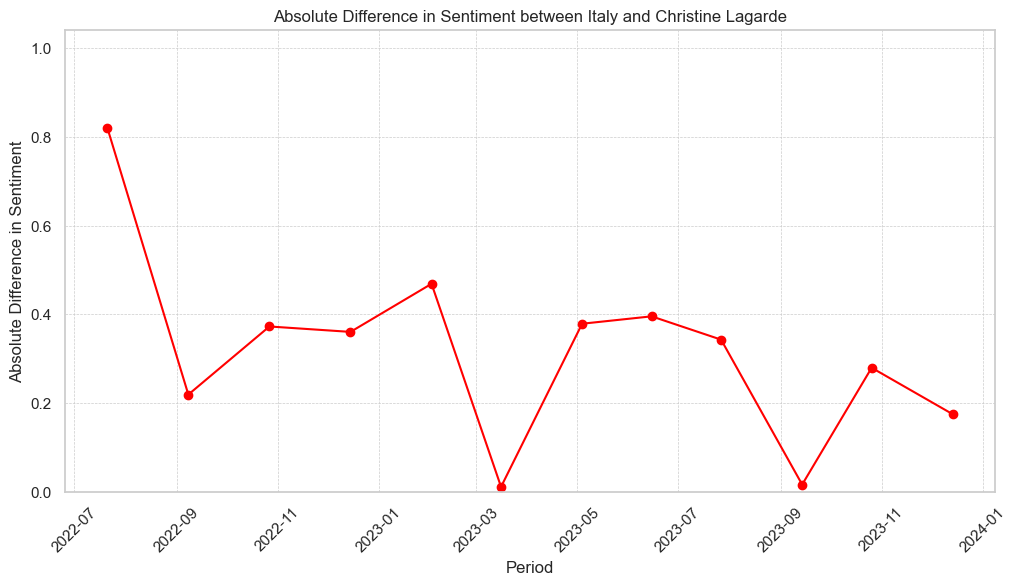

In [231]:
# Get the list of unique countries excluding Christine Lagarde
countries = combined_result_with_lagarde['Country'].unique()
countries = countries[countries != 'Christine Lagarde']

# Calculate the maximum absolute difference across all countries
max_diff = 0
for country in countries:
    country_data = combined_result_with_lagarde[combined_result_with_lagarde['Country'] == country]
    max_diff = max(max_diff, abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment']).max())

# Plot each country's sentiment vs Lagarde's sentiment and the absolute differences
for country in countries:
    country_data = combined_result_with_lagarde[combined_result_with_lagarde['Country'] == country]
    
    # Compute the absolute differences
    country_data['Absolute_Difference'] = abs(country_data['Sentiment_Per_Speaker'] - country_data['Lagarde_Sentiment'])
    
    # Line plot of absolute differences over time
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Period'], country_data['Absolute_Difference'], marker='o', color='red')
    plt.title(f"Absolute Difference in Sentiment between {country} and Christine Lagarde")
    plt.xlabel("Period")
    plt.ylabel("Absolute Difference in Sentiment")
    plt.ylim(0, max_diff)  # Set the y-axis limit to the maximum difference found
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45)
    plt.show()


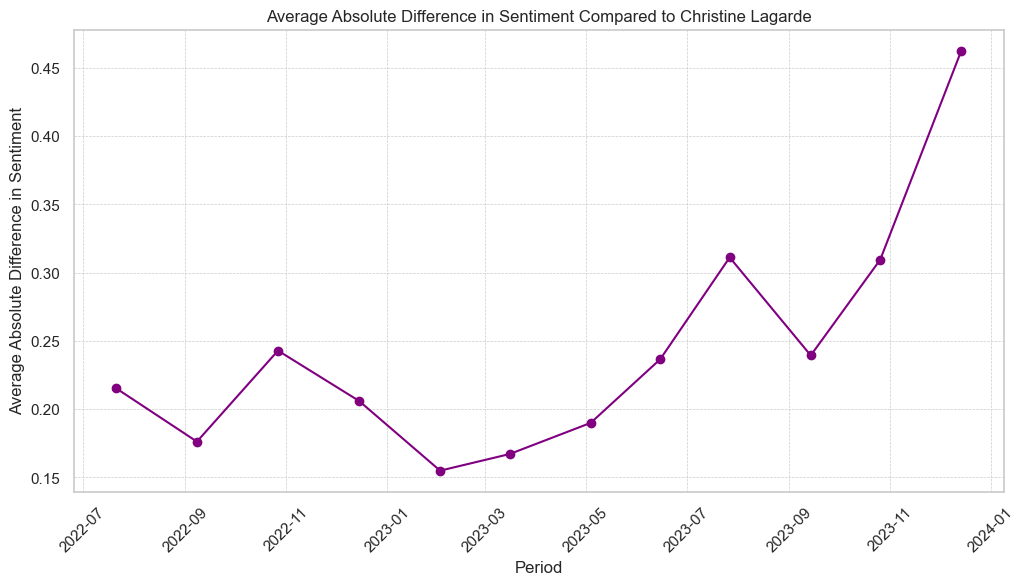

In [232]:
# Ensure the 'Period' column is in datetime format
combined_result_with_lagarde['Period'] = pd.to_datetime(combined_result_with_lagarde['Period'])

# Compute the absolute differences for each country compared to Christine Lagarde
combined_result_with_lagarde['Absolute_Difference'] = abs(combined_result_with_lagarde['Sentiment_Per_Speaker'] - combined_result_with_lagarde['Lagarde_Sentiment'])

# Calculate the average absolute difference for each period
average_absolute_difference = combined_result_with_lagarde.groupby('Period')['Absolute_Difference'].mean().reset_index()

# Plot the average absolute difference in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_absolute_difference['Period'], average_absolute_difference['Absolute_Difference'], marker='o', color='purple')
plt.title("Average Absolute Difference in Sentiment Compared to Christine Lagarde")
plt.xlabel("Period")
plt.ylabel("Average Absolute Difference in Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

C:\Users\monbi\AppData\Local\Temp\ipykernel_22432\3294914670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_result['Absolute_Difference'] = abs(filtered_combined_result['Sentiment_Per_Speaker'] - filtered_combined_result['Lagarde_Sentiment'])


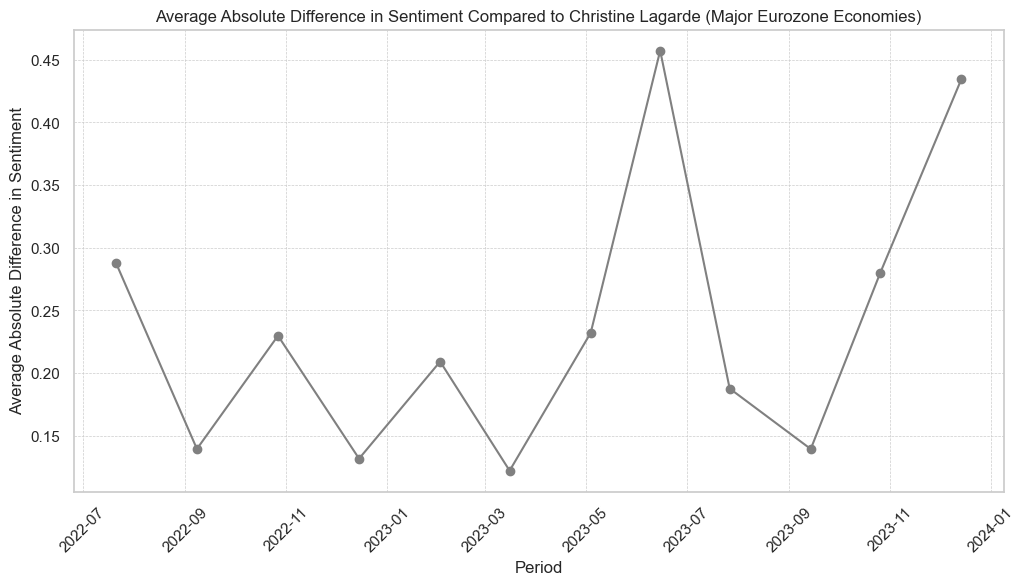

In [233]:
# List of major Eurozone economies
major_economies = ['France', 'Germany', 'Italy', 'Spain', 'Netherlands']

# Filter the DataFrame to include only the major Eurozone economies
filtered_combined_result = combined_result_with_lagarde[combined_result_with_lagarde['Country'].isin(major_economies)]

# Compute the absolute differences for each country compared to Christine Lagarde
filtered_combined_result['Absolute_Difference'] = abs(filtered_combined_result['Sentiment_Per_Speaker'] - filtered_combined_result['Lagarde_Sentiment'])

# Calculate the average absolute difference for each period
average_absolute_difference = filtered_combined_result.groupby('Period')['Absolute_Difference'].mean().reset_index()

# Plot the average absolute difference in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_absolute_difference['Period'], average_absolute_difference['Absolute_Difference'], marker='o', color='grey')
plt.title("Average Absolute Difference in Sentiment Compared to Christine Lagarde (Major Eurozone Economies)")
plt.xlabel("Period")
plt.ylabel("Average Absolute Difference in Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()